## Importation des librairies

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
import glob
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from load import MyDataProcessor
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, message="Only one sample available. You may want to reshape your data array")
warnings.filterwarnings("ignore", category=UserWarning, message="Scoring failed.")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.resetwarnings()


## Chargement des données et Séparation

In [57]:
# Créer une instance de la classe
data_processor = MyDataProcessor(data_path='./train.csv')

# Accéder aux données traitées
XTrain = data_processor.XTrain
YTrain = data_processor.YTrain
XTest = data_processor.XTest
YTest = data_processor.YTest


In [58]:
XTrain.shape

(693, 193)

In [59]:
# Stocker les métriques dans des tableaux
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

accuracy_values_pca = []
precision_values_pca = []
recall_values_pca = []
f1_values_pca = []

accuracy_values_fs = []
precision_values_fs = []
recall_values_fs = []
f1_values_fs = []

train = []
train_pca = []
train_fs = []

folder_path = 'Plots'

png_files = glob.glob(os.path.join(folder_path, '*.png'))

for file in png_files:
    os.remove(file)

## LDA 

- LDA en utilisant la Validation Croisée et la Recherche sur Grille

In [ ]:
from Classifiers.LDA import LDAWithRegularization
from Classifiers.LDA import LDAWithCrossValidationPCA
from Classifiers.LDA import LDAWithForwardSelectionAndGridSearch

Best Number of Folds for Cross-Validation: 7
Training Accuracy: 0.9725829725829725
Test Accuracy: 0.9225589225589226


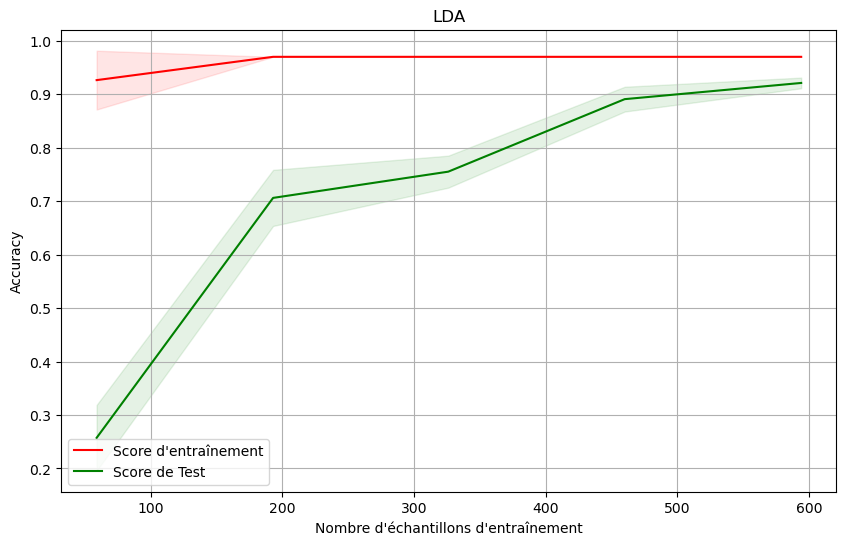

Precision: 0.9447811447811449
Recall: 0.9225589225589225
F1 Score: 0.9191919191919192


In [60]:
# Assuming XTrain, YTrain, XTest, YTest are your training and test data

lda_with_reg = LDAWithRegularization()

# Find the best number of folds for cross-validation
best_num_folds = lda_with_reg.find_best_num_folds_default(XTrain, YTrain)
print("Best Number of Folds for Cross-Validation:", best_num_folds)

# Perform a grid search with the best number of folds
lda_with_reg.fit(XTrain, YTrain, XTest, YTest, cv=best_num_folds)


# Fit the model with the best parameters on the complete training set
best_lda, best_lda_params, best_lda_score = lda_with_reg.grid_search(XTrain, YTrain, num_folds=best_num_folds)

YTrain_pred = best_lda.predict(XTrain)

train_accuracy = accuracy_score(YTrain, YTrain_pred)

# Evaluate the model on the test set
YTest_pred = best_lda.predict(XTest)

test_accuracy = accuracy_score(YTest, YTest_pred)

print("Training Accuracy:", train_accuracy)
train.append(train_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
lda_with_reg.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plot1.png')
plt.show()  # Display the plot

# Calculate and display precision, recall, and F1 score
precision = precision_score(YTest, YTest_pred, average='macro')
recall = recall_score(YTest, YTest_pred, average='macro')
f1 = f1_score(YTest, YTest_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

accuracy_values.append(test_accuracy)  # Append training accuracy for consistency
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)


- LDA en utlisant PCA 

Best Number of PCA Components: 50
Best Number of Cross-Validation Folds: 7
Best Parameters for LDA: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Cross-Validated Score for LDA: 0.9090909090909091


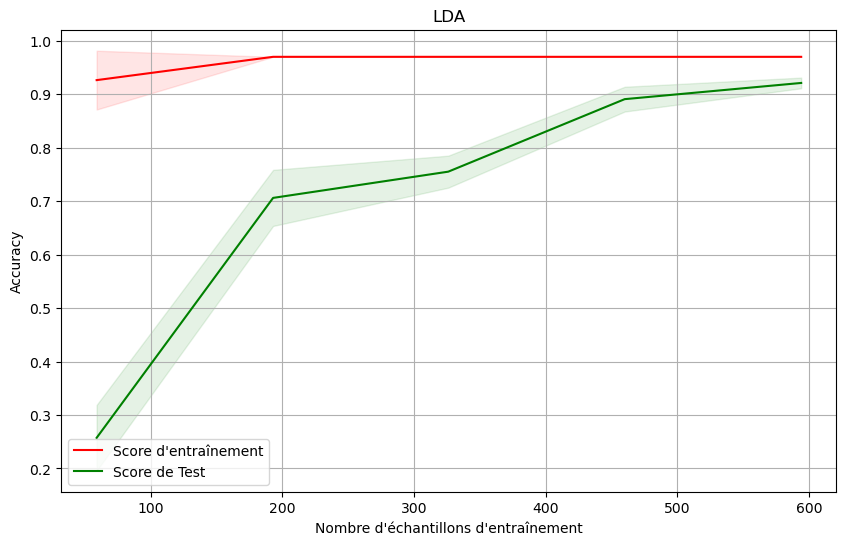

Accuracy(train): 0.9725829725829725
Accuracy: 0.9225589225589226
Precision: 0.9447811447811449
Recall: 0.9225589225589225
F1 Score: 0.9191919191919192


In [61]:
# Create an instance of the class
lda_cv = LDAWithCrossValidationPCA()

# Find the best number of PCA components
best_components, best_num_folds = lda_cv.find_best_pca_components(XTrain, YTrain)
print("Best Number of PCA Components:", best_components)
print("Best Number of Cross-Validation Folds:", best_num_folds)

# Perform a grid search with PCA components
best_lda, best_lda_params, best_lda_score = lda_cv.grid_search(XTrain, YTrain, n_components=best_components)
print("Best Parameters for LDA:", best_lda_params)
print("Best Cross-Validated Score for LDA:", best_lda_score)

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
lda_cv.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plotPCA1.png')
plt.show()  # Display the plot

# Fit the model with the best parameters on the complete training set
best_lda.fit(XTrain, YTrain)

# Evaluate the model on the test set
YTrain_pred = best_lda.predict(XTrain)

train_accuracy = accuracy_score(YTrain, YTrain_pred)
print("Accuracy(train):", train_accuracy)

# Evaluate the model on the test set
YTest_pred = best_lda.predict(XTest)

test_accuracy = accuracy_score(YTest, YTest_pred)
print("Accuracy:", test_accuracy)

# Calculate and display precision, recall, and F1 score
precision = precision_score(YTest, YTest_pred, average='macro')
recall = recall_score(YTest, YTest_pred, average='macro')
f1 = f1_score(YTest, YTest_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

train_pca.append(train_accuracy)
accuracy_values_pca.append(test_accuracy)  # Append training accuracy for consistency
precision_values_pca.append(precision)
recall_values_pca.append(recall)
f1_values_pca.append(f1)


- LDA en utilisant Forward Selection

Meilleur Nombre de Plis pour la Validation Croisée : 7
Meilleurs Paramètres pour LDA : {'shrinkage': 'auto', 'solver': 'lsqr'}
Meilleur Score de Validation Croisée pour LDA : 0.9913419913419913


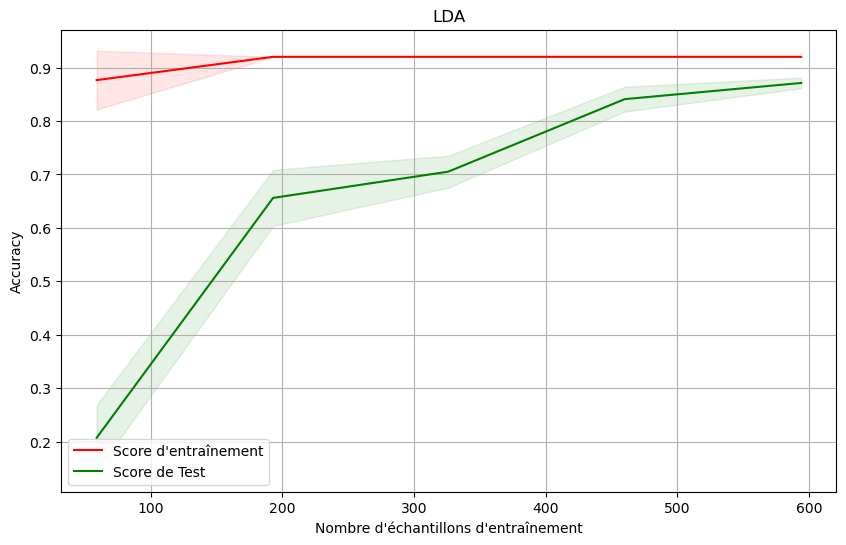

Accuracy(train): 0.9299999999999999
Accuracy: 0.85
Précision : 0.9447811447811449
Recall : 0.9225589225589225
Score F1 : 0.9191919191919192


In [62]:
# Créer une instance de la classe
forward_selection_lda_cv = LDAWithForwardSelectionAndGridSearch()

# Définir la plage de plis de validation croisée
cv_range = [3, 5, 7] 

# Trouver le meilleur nombre de plis pour la validation croisée
best_num_folds = forward_selection_lda_cv.find_best_num_folds(XTrain, YTrain, cv_range)
print("Meilleur Nombre de Plis pour la Validation Croisée :", best_num_folds)

# Effectuer une recherche en grille avec le meilleur nombre de plis
best_lda, best_lda_params, best_lda_score = forward_selection_lda_cv.grid_search(XTrain, YTrain, best_num_folds)
print("Meilleurs Paramètres pour LDA :", best_lda_params)
print("Meilleur Score de Validation Croisée pour LDA :", best_lda_score)

# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 5)
forward_selection_lda_cv.plot_learning_curve(XTrain, YTrain, train_sizes,best_num_folds)
plt.savefig('./Plots/plotFS1.png')
plt.show()  # Afficher le graphique

# Ajuster le modèle avec les meilleurs paramètres sur l'ensemble d'entraînement complet
best_lda.fit(XTrain, YTrain)


# Prédire les étiquettes de l'ensemble de test
YTrain_pred = best_lda.predict(XTrain)

# Évaluer le modèle sur l'ensemble de test
train_accuracy = best_lda.score(XTrain, YTrain_pred)
print("Accuracy(train):", train_accuracy)
train_fs.append(train_accuracy)

# Prédire les étiquettes de l'ensemble de test
YTest_pred = best_lda.predict(XTest)

# Évaluer le modèle sur l'ensemble de test
test_accuracy = best_lda.score(XTest, YTest_pred)
print("Accuracy:", test_accuracy)

# Calculer et afficher la précision, le rappel et le score F1
precision = precision_score(YTest, YTest_pred, average='macro') 
recall = recall_score(YTest, YTest_pred, average='macro')  
f1 = f1_score(YTest, YTest_pred, average='macro')  

print("Précision :", precision)
print("Recall :", recall)
print("Score F1 :", f1)

# Ajouter la précision du test au tableau
accuracy_values_fs.append(test_accuracy)
precision_values_fs.append(precision)
recall_values_fs.append(recall)
f1_values_fs.append(f1)

## DecisionTree

In [ ]:
from Classifiers.DecisionTree import DecisionTreeWithCrossValidationGridSearch
from Classifiers.DecisionTree import DecisionTreeWithPCACrossValidationGridSearch
from Classifiers.DecisionTree import DecisionTreeWithForwardSelectionAndGridSearch

- DecisionTree en utilisant la Validation Croisée et la Recherche sur Grille

Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
Meilleur score de validation croisée: 0.4213564213564213
Accuracy(train): 0.5894660894660895


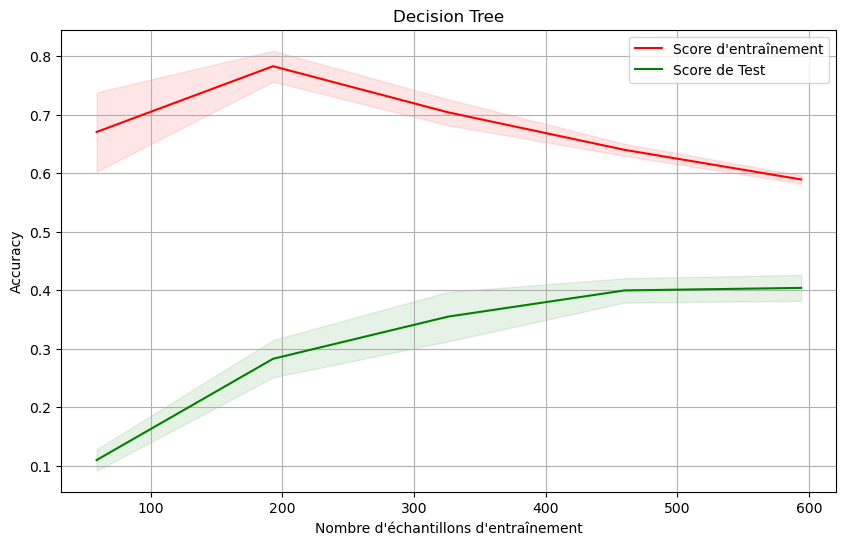

Accuracy(test):  0.40404040404040403
Précision: 0.3095117845117845
Recall: 0.404040404040404
Score F1: 0.32647044313710977


In [64]:
# Créer une instance de la classe
decision_tree_cv = DecisionTreeWithCrossValidationGridSearch()

# Effectuer une recherche en grille
meilleurs_parametres, meilleur_score = decision_tree_cv.grid_search(XTrain, YTrain)
print("Meilleurs paramètres:", meilleurs_parametres)
print("Meilleur score de validation croisée:", meilleur_score)

# Tracer la courbe d'apprentissage
tailles_entrainement = np.linspace(0.1, 1.0, 5)
cv_range = [3, 7]  # Spécifiez la plage cv_range
decision_tree_cv.plot_learning_curve(XTrain, YTrain, tailles_entrainement, cv_range)
plt.savefig('./Plots/plot2.png')
plt.show()  # Afficher le graphique

# Ajuster le modèle avec les meilleurs paramètres sur l'ensemble d'entraînement complet
decision_tree_cv.decision_tree.fit(XTrain, YTrain)

# Prédire les étiquettes de l'ensemble de test
YTest_pred = decision_tree_cv.decision_tree.predict(XTest)
# Évaluer le modèle sur l'ensemble de test
test_accuracy = decision_tree_cv.decision_tree.score(XTest, YTest)
print("Accuracy(test): ", test_accuracy)

# Calculer et imprimer la précision, le rappel et le score F1
precision = precision_score(YTest, YTest_pred, average='macro')  
recall = recall_score(YTest, YTest_pred, average='macro')  
f1 = f1_score(YTest, YTest_pred, average='macro')  

print("Précision:", precision)
print("Recall:", recall)
print("Score F1:", f1)

accuracy_values.append(test_accuracy)  # Append training accuracy for consistency
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)


- DecisionTree en utilisant le PCA

Best PCA Parameters: {'n_components': 100}
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}
Best Cross-Validated Score for Decision Tree: 0.3564213564213564
Accuracy(train): 0.5803270803270805


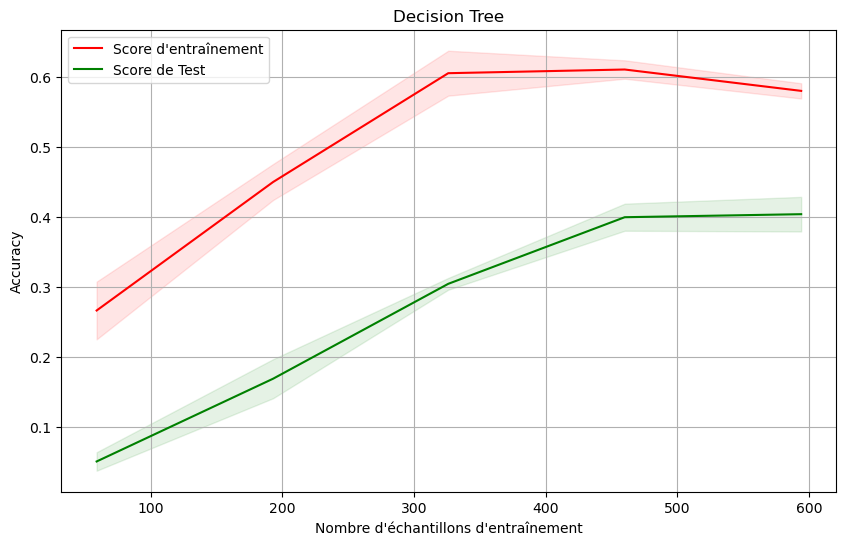

Accuracy:  0.4175084175084175
Precision: 0.3214387464387464
Recall: 0.4175084175084174
F1 Score: 0.3330918520312459


In [65]:
# Create an instance of the class
dt_with_pca_cv = DecisionTreeWithPCACrossValidationGridSearch()

# Perform grid search
best_pca_params, best_dt_params, best_dt_score = dt_with_pca_cv.grid_search(XTrain, YTrain)
print("Best PCA Parameters:", best_pca_params)
print("Best Decision Tree Parameters:", best_dt_params)
print("Best Cross-Validated Score for Decision Tree:", best_dt_score)

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
cv_range = [3, 7]  # Specify the cv_range
dt_with_pca_cv.plot_learning_curve(XTrain, YTrain, train_sizes, cv_range)
plt.savefig('./Plots/plotPCA2.png')
plt.show()  # Display the plot

# Fit the model with the best parameters on the complete training set
dt_with_pca_cv.decision_tree.fit(XTrain, YTrain)

# Evaluate the model on the test set
test_accuracy = dt_with_pca_cv.decision_tree.score(XTest, YTest)
print("Accuracy: ", test_accuracy)

# Make predictions on the test set
YTest_pred = dt_with_pca_cv.decision_tree.predict(XTest)

# Calculate and display precision, recall, and F1 score
precision = precision_score(YTest, YTest_pred, average='macro')  
recall = recall_score(YTest, YTest_pred, average='macro')  
f1 = f1_score(YTest, YTest_pred, average='macro')  

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

accuracy_values_pca.append(test_accuracy)
precision_values_pca.append(precision)
recall_values_pca.append(recall)
f1_values_pca.append(f1)


- DecisionTree en utilisant Feature Selection 

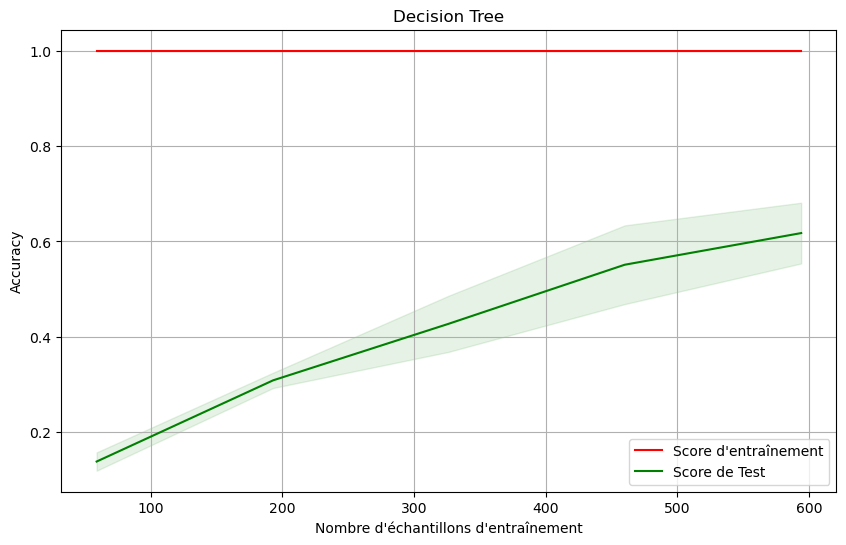

Accuracy(train) : 0.950937950937951
Accuracy : 0.6262626262626263
Précision : 0.6367083533750201
Recall : 0.6262626262626262
Score F1 : 0.6002565335898669
Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [66]:
# Create an instance of the class DecisionTreeWithForwardSelectionAndGridSearch
classifier = DecisionTreeWithForwardSelectionAndGridSearch()

# Specify the range of cross-validation values
cv_range = [3, 7]  

# Fit the model
best_cv = classifier.find_best_cv(XTrain, YTrain, cv_range)

classifier.fit(XTrain, YTrain, best_cv)
train_sizes = np.linspace(0.1, 1.0, 5)
classifier.plot_learning_curve(XTrain, YTrain, train_sizes, best_cv)
plt.savefig('./Plots/plotFS2.png')
plt.show()

# Perform a grid search to find the best hyperparameters
best_clf, best_params, best_score = classifier.grid_search(XTrain, YTrain)

# Use the best model to make predictions on XTest
y_pred = best_clf.predict(XTest)

# Use the best model to make predictions on XTrain
y_pred_train = best_clf.predict(XTrain)
test_accuracy_train = accuracy_score(YTrain, y_pred_train)

# Effectuer une recherche en grille pour trouver les meilleurs hyperparamètres
best_clf, best_params, best_score = classifier.grid_search(XTrain, YTrain)

# Utiliser le meilleur modèle pour effectuer des prédictions sur XTest
y_pred = best_clf.predict(XTest)

# Utiliser le meilleur modèle pour effectuer des prédictions sur XTest
y_pred_train = best_clf.predict(XTrain)
train_accuracy_train = accuracy_score(YTrain, y_pred_train)
print(f"Accuracy(train) : {train_accuracy_train}")
train_fs.append(train_accuracy_train)

# Calculer la précision sur l'ensemble de test
test_accuracy = accuracy_score(YTest, y_pred)
precision = precision_score(YTest, y_pred, average='macro')
recall = recall_score(YTest, y_pred, average='macro') 
f1 = f1_score(YTest, y_pred, average='macro') 

print(f"Accuracy : {test_accuracy}")
print(f"Précision : {precision}")
print(f"Recall : {recall}")
print(f"Score F1 : {f1}")
print(f"Meilleurs paramètres : {best_params}")

accuracy_values_fs.append(test_accuracy)
precision_values_fs.append(precision)
recall_values_fs.append(recall)
f1_values_fs.append(f1)


## Bagging Classifier 

In [ ]:
from Classifiers.Bagging import BaggingWithCrossValidationGridSearch
from Classifiers.Bagging import PCAandBaggingWithCrossValidationGridSearch
from Classifiers.Bagging import BaggingWithForwardSelectionAndGridSearch

- Bagging en utilisant la Validation Croisée et la Recherche sur Grille

knBest hyperparameters for Bagging:
base_estimator: DecisionTreeClassifier()
max_features: 0.5
max_samples: 0.25
n_estimators: 10
Accuracy (train): 0.8658008658008658
Accuracy (test): 0.569023569023569
Precision: 0.5741341991341992
Recall: 0.5690235690235691
F1 Score: 0.5339010035979733


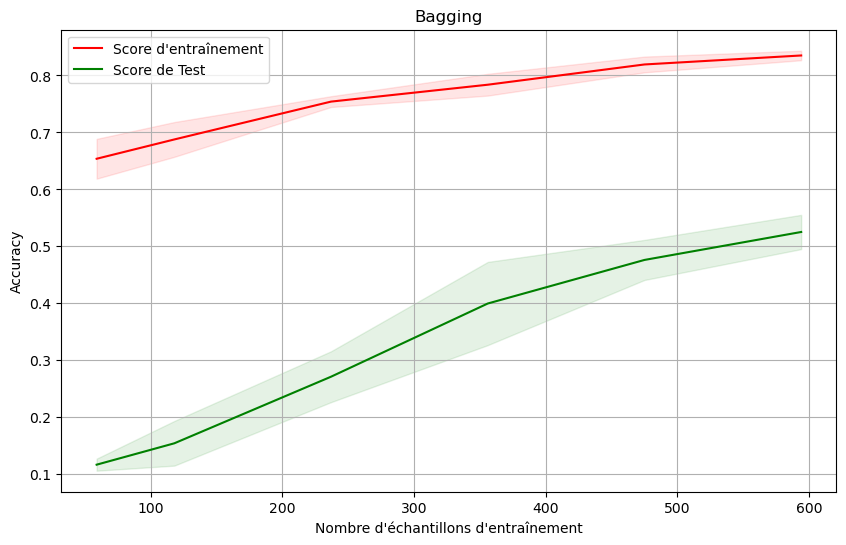

In [68]:
estimator = DecisionTreeClassifier()
bagging_cv = BaggingWithCrossValidationGridSearch(estimator)
cv_range = [3, 5, 7]
best_folds = bagging_cv.find_best_num_folds(XTrain, YTrain)

# Perform a grid search to find the best hyperparameters for Bagging
best_params, best_score = bagging_cv.grid_search(XTrain, YTrain, best_folds)

# Access the best hyperparameters from the grid search result
print("knBest hyperparameters for Bagging:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Adjust the base estimator (DecisionTreeClassifier) with the training data
bagging_cv.clf.fit(XTrain, YTrain, )

# Calculate training accuracy
train_accuracy_bagging = bagging_cv.clf.score(XTrain, YTrain)

# Use the adjusted base estimator to make predictions on XTest
YPredBagging = bagging_cv.clf.predict(XTest)

# Calculate accuracy on the test set
test_accuracy_bagging = accuracy_score(YTest, YPredBagging)
precision_bagging = precision_score(YTest, YPredBagging, average='macro')
recall_bagging = recall_score(YTest, YPredBagging, average='macro')
f1_bagging = f1_score(YTest, YPredBagging, average='macro')

# Print the results
print(f"Accuracy (train): {train_accuracy_bagging}")
print(f"Accuracy (test): {test_accuracy_bagging}")
print(f"Precision: {precision_bagging}")
print(f"Recall: {recall_bagging}")
print(f"F1 Score: {f1_bagging}")

# Plot the learning curve
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
bagging_cv.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plot3.png')
plt.show()

train.append(train_accuracy_bagging)
accuracy_values.append(test_accuracy_bagging) 
precision_values.append(precision)
recall_values.append(precision_bagging)
f1_values.append(f1_bagging)


- Bagging en utilisant le PCA

Meilleurs hyperparamètres pour PCA:
n_components: 10
Meilleurs hyperparamètres pour Bagging:
base_estimator: DecisionTreeClassifier()
max_features: 0.5
max_samples: 0.25
n_estimators: 10
Accuracy(train): 0.7647907647907648
Accuracy: 0.39730639730639733
Précision : 0.3765071348404681
Recall : 0.3973063973063973
Score F1 : 0.35602147571844545


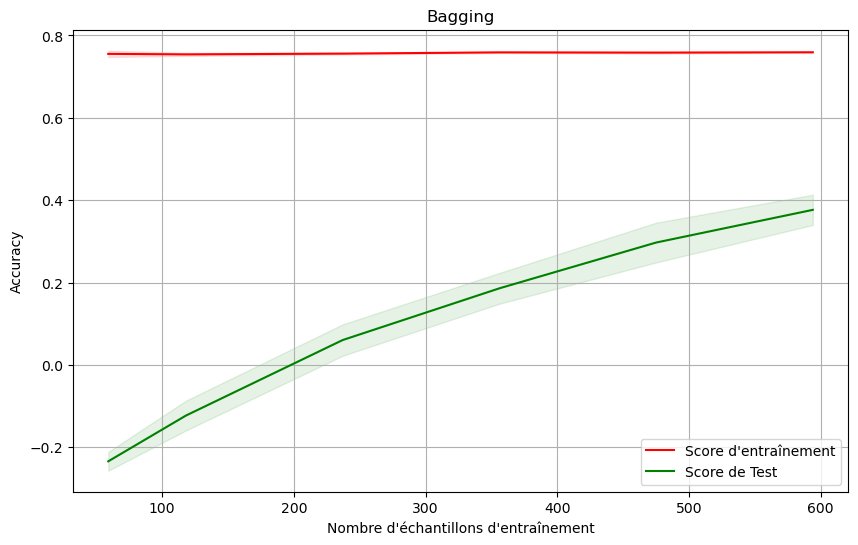

In [69]:
# Create an instance of the PCAandBaggingWithCrossValidationGridSearch class
estimator = DecisionTreeClassifier()
pca_bagging_cv = PCAandBaggingWithCrossValidationGridSearch(estimator)

# Effectuer une recherche en grille pour trouver les meilleurs hyperparamètres pour PCA et Bagging
best_pca, best_clf, best_pca_params, best_pca_score, best_clf_params, best_clf_score = pca_bagging_cv.grid_search(XTrain, YTrain)

# Accéder aux meilleurs hyperparamètres à partir du résultat de la recherche en grille
print("Meilleurs hyperparamètres pour PCA:")
for param, value in best_pca_params.items():
    print(f"{param}: {value}")

print("Meilleurs hyperparamètres pour Bagging:")
for param, value in best_clf_params.items():
    print(f"{param}: {value}")

XTrain_pca = best_pca.transform(XTrain)
YPredPCAandBagging_train = best_clf.predict(XTrain_pca)
test_accuracy_pca_bagging_train = accuracy_score(YTrain, YPredPCAandBagging_train)
print(f"Accuracy(train): {test_accuracy_pca_bagging_train}")

# Utiliser le meilleur modèle pour faire des prédictions sur XTest
XTest_pca = best_pca.transform(XTest)
YPredPCAandBagging = best_clf.predict(XTest_pca)

# Calculer la précision sur l'ensemble de test
test_accuracy_pca_bagging = accuracy_score(YTest, YPredPCAandBagging)
precision_pca_bagging = precision_score(YTest, YPredPCAandBagging, average='macro')
recall_pca_bagging = recall_score(YTest, YPredPCAandBagging, average='macro')
f1_pca_bagging = f1_score(YTest, YPredPCAandBagging, average='macro')

print(f"Accuracy: {test_accuracy_pca_bagging}")
print(f"Précision : {precision_pca_bagging}")
print(f"Recall : {recall_pca_bagging}")
print(f"Score F1 : {f1_pca_bagging}")

# Tracer la courbe d'apprentissage
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
pca_bagging_cv.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plotPCA3.png')
plt.show()

train_pca.append(test_accuracy_pca_bagging_train)
accuracy_values_pca.append(test_accuracy_pca_bagging)  # Append training accuracy for consistency
precision_values_pca.append(precision_pca_bagging)
recall_values_pca.append(recall_pca_bagging)
f1_values_pca.append(f1_pca_bagging)

- Bagging Classifier en utilisant Forward Selection

Meilleur Nombre de Plis pour la Validation Croisée : 7
Meilleurs hyperparamètres pour Bagging avec Forward Selection:
base_estimator: DecisionTreeClassifier()
max_features: 0.2
max_samples: 0.25
n_estimators: 10
Accuracy(train): 0.8455988455988456
Accuracy: 0.5858585858585859
Précision : 0.5936227352894019
Recall : 0.585858585858586
Score F1 : 0.5585399449035813


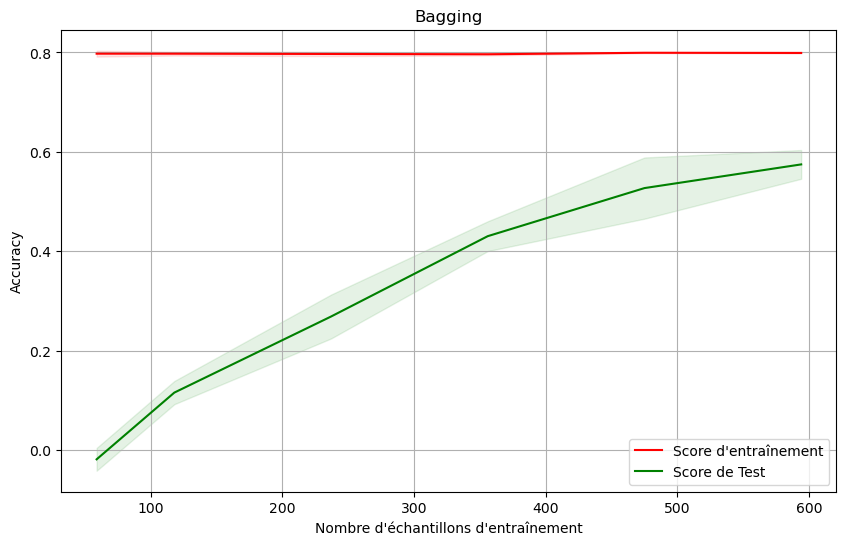

In [70]:
# Créer une instance de la classe BaggingWithForwardSelectionAndGridSearch
estimator = DecisionTreeClassifier()  
bagging_forward = BaggingWithForwardSelectionAndGridSearch(estimator)

# Trouver le meilleur nombre de plis pour la validation croisée
best_num_folds = bagging_forward.find_best_num_folds(XTrain, YTrain)
print("Meilleur Nombre de Plis pour la Validation Croisée :", best_num_folds)

# Effectuer une recherche en grille avec le meilleur nombre de plis
best_clf, best_params, best_score = bagging_forward.grid_search(XTrain, YTrain)

# Accéder aux meilleurs hyperparamètres à partir du résultat de la recherche en grille
print("Meilleurs hyperparamètres pour Bagging avec Forward Selection:")
for param, value in best_params.items():
    print(f"{param}: {value}")

YPredBaggingForward_train = best_clf.predict(XTrain)
test_accuracy_bagging_forward_train = accuracy_score(YTrain, YPredBaggingForward_train)

# Utiliser le meilleur modèle pour faire des prédictions sur XTest
YPredBaggingForward = best_clf.predict(XTest)
print(f"Accuracy(train): {test_accuracy_bagging_forward_train}")
train_fs.append(test_accuracy_bagging_forward_train)

# Calculer la précision sur l'ensemble de test
test_accuracy_bagging_forward = accuracy_score(YTest, YPredBaggingForward)
precision_bagging_forward = precision_score(YTest, YPredBaggingForward, average='macro') 
recall_bagging_forward = recall_score(YTest, YPredBaggingForward, average='macro') 
f1_bagging_forward = f1_score(YTest, YPredBaggingForward, average='macro')  

# Ajouter les résultats au tableau
accuracy_values_fs.append(test_accuracy_bagging_forward)
precision_values_fs.append(precision_bagging_forward)
recall_values_fs.append(recall_bagging_forward)
f1_values_fs.append(f1_bagging_forward)

print(f"Accuracy: {test_accuracy_bagging_forward}")
print(f"Précision : {precision_bagging_forward}")
print(f"Recall : {recall_bagging_forward}")
print(f"Score F1 : {f1_bagging_forward}")

# Tracer la courbe d'apprentissage
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
bagging_forward.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plotFS3.png')
plt.show()


## Perceptron 

In [ ]:
from Classifiers.Perceptron import PerceptronCVGridSearch
from Classifiers.Perceptron import PerceptronCVPCAWithPreprocessing
from Classifiers.Perceptron import PerceptronCVForwardSelectionWithPreprocessing

-  Perceptron utilisant la Validation Croisée et la Recherche sur Grille


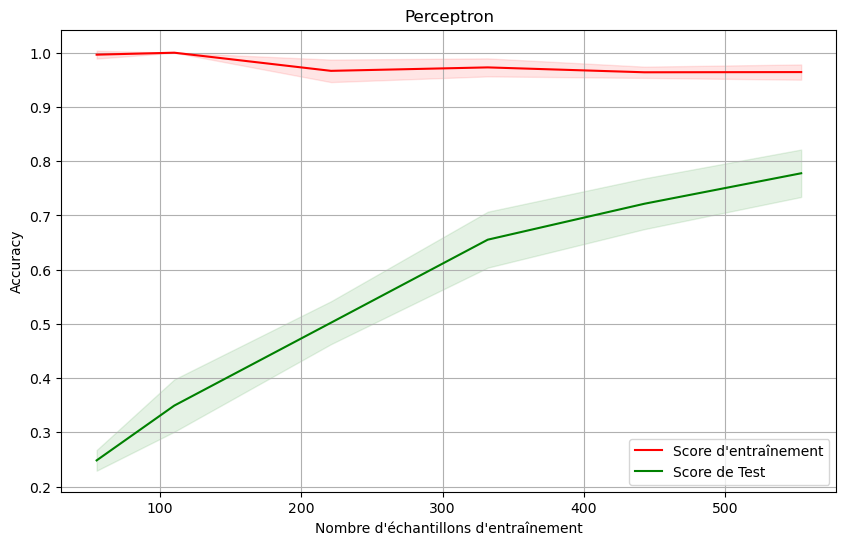

Accuracy(train): 0.9855699855699855
Accuracy: 0.8754208754208754
Précision : 0.9082491582491582
Recall : 0.8754208754208753
Score F1 : 0.8695286195286196


In [72]:
# Définit des paramètres, données et autres variables
param_grid = {
    "perceptron__alpha": np.logspace(-7, 3, num=21),
}

cv_range = [3, 5]  # Définit notre plage de valeurs de validation croisée
n_jobs = -1
scoring = "accuracy"
# Instancier la classe PerceptronCVGridSearch
grid_search_class = PerceptronCVGridSearch(param_grid, cv_range, n_jobs, scoring)

cv=grid_search_class.find_best_num_folds(XTrain,YTrain)
# Appeler la recherche en grille et tracer la courbe d'apprentissage
best_params, best_cv_score = grid_search_class.grid_search(XTrain, YTrain)
grid_search_class.plot_learning_curve(XTrain, YTrain, train_sizes,cv)
plt.savefig('./Plots/plot4.png')
plt.show()

y_pred_train = grid_search_class.clf.predict(XTrain)
accuracy_train = accuracy_score(YTrain, y_pred_train)
print(f"Accuracy(train): {accuracy_train}")
train.append(accuracy_train)

# Faire des prédictions sur XTest
y_pred = grid_search_class.clf.predict(XTest)

# Calculer la précision sur l'ensemble de test
accuracy = accuracy_score(YTest, y_pred)
precision = precision_score(YTest, y_pred, average='macro') 
recall = recall_score(YTest, y_pred, average='macro')  
f1 = f1_score(YTest, y_pred, average='macro') 

# Ajouter les résultats au tableau
accuracy_values.append(accuracy)
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)

print(f"Accuracy: {accuracy}")
print(f"Précision : {precision}")
print(f"Recall : {recall}")
print(f"Score F1 : {f1}")


- Perceptron en utilisant le PCA

Best Parameters: {'alpha': 1e-07, 'n_components': 60}
Best Cross-Validation Score: 0.8585548952142634
Accuracy Train: 0.8955699855699856
Accuracy Test: 0.8056228956228957
Precision on Test Data: 0.9202020202020202
Recall on Test Data: 0.8956228956228957
F1 Score on Test Data: 0.8948051948051948


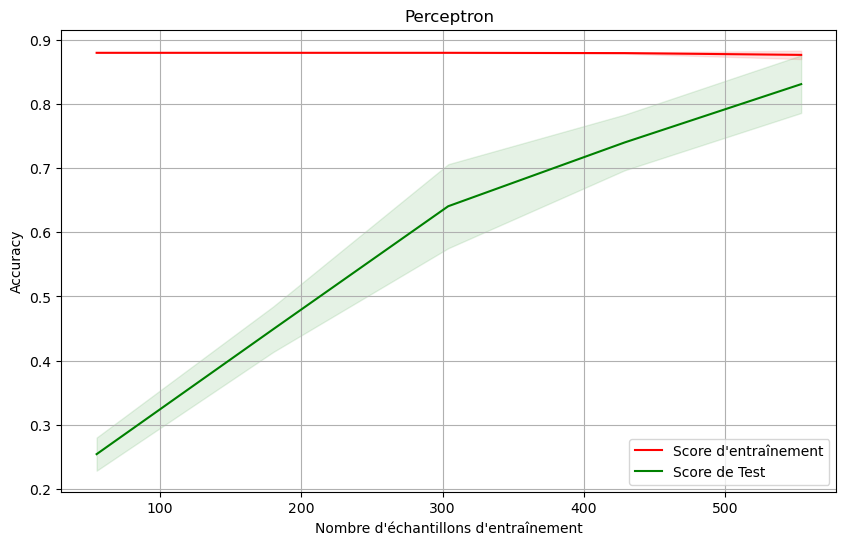

In [73]:
# Define your parameter ranges
alpha_range = np.logspace(-7, 3, num=21)
pca_components_range = [10, 20, 30, 40, 60]
cv_range = [3, 5]

# Instantiate the PerceptronCVPCAWithPreprocessing class
pca_class = PerceptronCVPCAWithPreprocessing(alpha_range, pca_components_range, cv_range)

# Perform grid search with cross-validation
best_params, best_cv_score = pca_class.grid_search(XTrain, YTrain)
cv=pca_class.find_best_num_folds(XTrain,YTrain)
# Print the best parameters and cross-validation score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_cv_score)

# Fit the best model on the training data
pca_class.best_estimator_.fit(XTrain, YTrain)

# Make predictions on the training data
y_train_pred = pca_class.best_estimator_.predict(XTrain)

# Evaluate on the training data
train_accuracy = accuracy_score(YTrain, y_train_pred)
print("Accuracy Train:", train_accuracy)
train_pca.append(train_accuracy)

# Evaluate on the test data
test_accuracy = accuracy_score(YTest, pca_class.best_estimator_.predict(XTest))
print("Accuracy Test:", test_accuracy)

# Make predictions on the test data
y_test_pred = pca_class.best_estimator_.predict(XTest)

# Calculate precision, recall, and F1 score on the test data
precision_test = precision_score(YTest, y_test_pred, average='macro')
recall_test = recall_score(YTest, y_test_pred, average='macro')
f1_test = f1_score(YTest, y_test_pred, average='macro')

# Print the precision, recall, and F1 score on the test data
print("Precision on Test Data:", precision_test)
print("Recall on Test Data:", recall_test)
print("F1 Score on Test Data:", f1_test)

# Ajouter les résultats au tableau
accuracy_values_pca.append(test_accuracy)
precision_values_pca.append(precision_test)
recall_values_pca.append(recall_test)
f1_values_pca.append(f1_test)

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
pca_class.plot_learning_curve(XTrain, YTrain, train_sizes, cv)

# Save the plot before showing it
plt.savefig('./Plots/plotPCA4.png')

# Show the plot
plt.show()


- Perceptron en utilisant Forward Selection

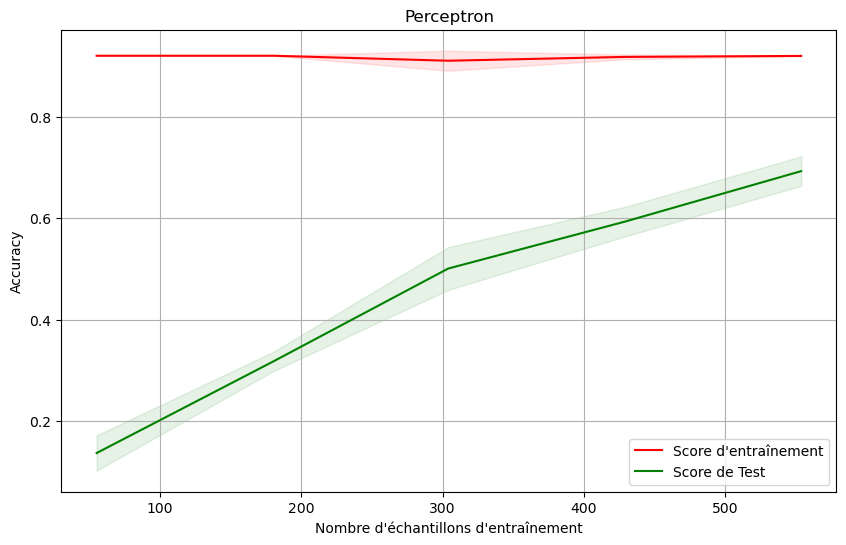

Accuracy(train): 0.8210678210678211
Accuracy: 0.5723905723905723
Precision: 0.6073187681883334
Recall on test data: 0.5723905723905723
F1 Score on test data: 0.5570449391877963


In [74]:
# Définir vos paramètres, données et autres variables
alpha_range = np.logspace(-7, -3, num=21)
max_num_features_range = range(100, 50, -10) 
cv_range = [3, 5]  
n_jobs = -1
scoring = "accuracy"
train_sizes = np.linspace(0.1, 1.0, 5)
# Instancier la classe PerceptronCVForwardSelectionWithPreprocessing
improved_perceptron_class = PerceptronCVForwardSelectionWithPreprocessing(alpha_range, max_num_features_range, cv_range, n_jobs, scoring)

# Appliquer StandardScaler pour la mise à l'échelle des caractéristiques
scaler = StandardScaler()
XTrain_scaled = scaler.fit_transform(XTrain)
XTest_scaled = scaler.transform(XTest)

# Appeler la méthode grid_search
best_params, best_cv_score = improved_perceptron_class.grid_search(XTrain_scaled, YTrain)

# Tracer la courbe d'apprentissage
improved_perceptron_class.plot_learning_curve(XTrain_scaled, YTrain, train_sizes)
plt.savefig('./Plots/plotFS4.png')
plt.show()

# Appliquer la même sélection de caractéristiques aux ensembles d'entraînement et de test
XTrain_selected = XTrain_scaled[:, :best_params["max_features"]]
XTest_selected = XTest_scaled[:, :best_params["max_features"]]

# Entraîner le modèle final sur l'ensemble d'entraînement complet avec les meilleurs paramètres
final_perceptron = Perceptron(max_iter=5000, eta0=0.1, alpha=best_params["alpha"])
final_perceptron.fit(XTrain_selected, YTrain)

y_train_pred = final_perceptron.predict(XTrain_selected)
train_accuracy = accuracy_score(YTrain, y_train_pred)
print("Accuracy(train):", train_accuracy)
train_fs.append(train_accuracy)

# Faire des prédictions sur l'ensemble de test
y_test_pred = final_perceptron.predict(XTest_selected)

# Calculer et afficher les métriques sur le test
test_accuracy = accuracy_score(YTest, y_test_pred)
precision_test = precision_score(YTest, y_test_pred, average='macro')
recall_test = recall_score(YTest, y_test_pred, average='macro')
f1_test = f1_score(YTest, y_test_pred, average='macro')

# Ajouter les résultats au tableau
accuracy_values_fs.append(test_accuracy)
precision_values_fs.append(precision_test)
recall_values_fs.append(recall_test)
f1_values_fs.append(f1_test)

# Afficher les métriques sur le test
print("Accuracy:", test_accuracy)
print(f"Precision: {precision_test}")
print(f"Recall on test data: {recall_test}")
print(f"F1 Score on test data: {f1_test}")


## Multi Layer Perceptron

In [ ]:
from Classifiers.MLP import MLPClassifierCVGridSearch
from Classifiers.MLP import MLPClassifierCVPCAWithPreprocessing
from Classifiers.MLP import MLPClassifierCVFeatureSelection

- MLP en utilisant la Validation Croisée et la Recherche sur Grille

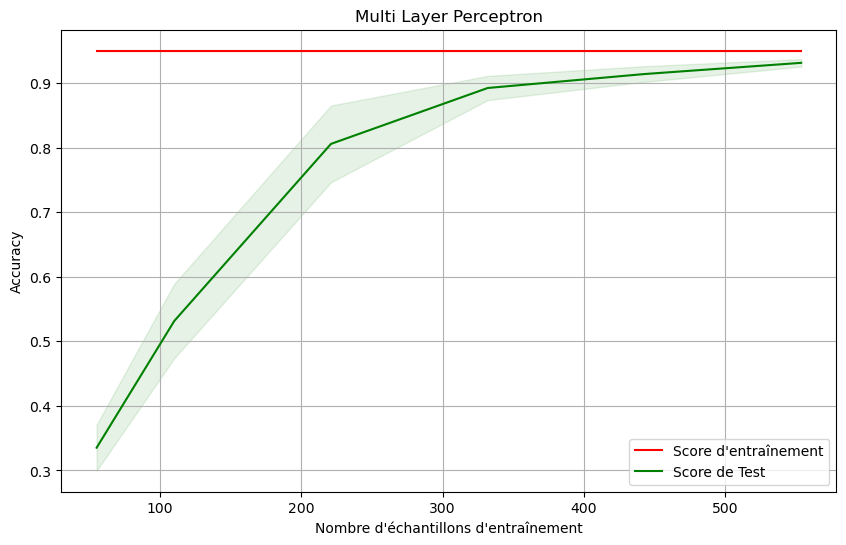

Accuracy(train): 0.95
Accuracy: 0.923063973063973
Précision : 0.9797979797979798
Recall : 0.9730639730639732
Score F1 : 0.9722943722943722


In [76]:
# Définissons nos paramètres et vos données
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
}
cv_range = [3, 5]  # Utilisons moins de plis de validation croisée
n_jobs = -1
scoring = "accuracy"
 
# Instancier la classe MLPClassifierCVGridSearch
grid_search_class = MLPClassifierCVGridSearch(param_grid, cv_range, n_jobs, scoring)
 
# Appeler la recherche par grille et tracer la courbe d'apprentissage
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
best_params, best_cv_score = grid_search_class.grid_search(XTrain, YTrain)
grid_search_class.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plot5.png')
plt.show()
 
y_pred_train = grid_search_class.clf.predict(XTrain)
accuracy_train = accuracy_score(YTrain, y_pred_train)
print(f"Accuracy(train):", accuracy_train)
train.append(accuracy_train)

y_pred = grid_search_class.clf.predict(XTest)
 
# Calculer la précision
accuracy = accuracy_score(YTest, y_pred)
precision = precision_score(YTest, y_pred, average='macro')
recall = recall_score(YTest, y_pred, average='macro')  
f1 = f1_score(YTest, y_pred, average='macro')  
 
# Ajouter les résultats au tableau
accuracy_values.append(accuracy)
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)
 
# Imprimer la précision sur les données de test
print(f"Accuracy:", accuracy)
print(f"Précision : {precision}")
print(f"Recall : {recall}")
print(f"Score F1 : {f1}")

- MLP en utlisant le PCA

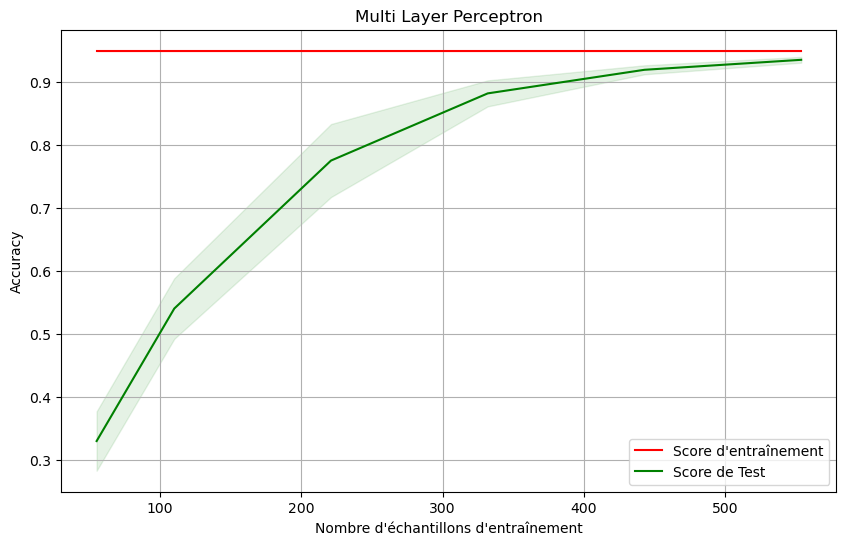

Accuracy(train): 0.95
Accuracy: 0.9264309764309764
Precision: 0.9823232323232324
Recall: 0.9764309764309763
F1 Score: 0.9757575757575758


In [77]:
class MLPClassifierWithPCACVGridSearch:
    def __init__(self, param_grid, cv_range, n_jobs=-1, scoring="accuracy"):
        self.n_jobs = n_jobs
        self.scoring = scoring
        self.clf = make_pipeline(StandardScaler(), PCA(), MLPClassifier(activation='logistic', max_iter=3000))
        self.param_grid = param_grid
        self.cv_range = cv_range

    def grid_search(self, X, y):
        best_cv_score = -1
        best_cv = None
        best_params = None

        for cv in self.cv_range:
            grid_search = GridSearchCV(self.clf, self.param_grid, cv=cv, n_jobs=self.n_jobs, scoring=self.scoring)
            grid_search.fit(X, y)

            if grid_search.best_score_ > best_cv_score:
                best_cv_score = grid_search.best_score_
                best_cv = cv
                best_params = grid_search.best_params_

        self.clf = grid_search.best_estimator_
        return best_params, best_cv_score


    def plot_learning_curve(self, X, y, train_sizes):
        train_sizes, train_scores, test_scores = learning_curve(
            self.clf, X, y, train_sizes=train_sizes, cv=self.cv_range[-1], n_jobs=self.n_jobs, scoring=self.scoring
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))

        # Plot mean training and test scores
        plt.plot(train_sizes, train_scores_mean, label="Score d'entraînement", color="r")
        plt.plot(train_sizes, test_scores_mean, label="Score de Test", color="g")

        # Add shaded regions for the variability in training and test scores
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="g")

        plt.xlabel("Nombre d'échantillons d'entraînement")
        plt.ylabel('Accuracy')
        plt.title("Multi Layer Perceptron")
        plt.legend()
        plt.grid()
# Define parameters and your data
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
}

cv_range = [3, 5]  # Use fewer cross-validation folds
n_jobs = -1
scoring = "accuracy"

# Instantiate the class MLPClassifierWithPCACVGridSearch
grid_search_class = MLPClassifierWithPCACVGridSearch(param_grid, cv_range, n_jobs, scoring)

# Perform grid search and plot the learning curve
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
best_params, best_cv_score = grid_search_class.grid_search(XTrain, YTrain)
grid_search_class.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plotPCA5.png')
plt.show()

y_pred_train = grid_search_class.clf.predict(XTrain)
accuracy_train = accuracy_score(YTrain, y_pred_train)
print(f"Accuracy(train):", accuracy_train)
train_pca.append(accuracy_train)

# Predict on the test set
y_pred = grid_search_class.clf.predict(XTest)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(YTest, y_pred)
precision = precision_score(YTest, y_pred, average='macro')
recall = recall_score(YTest, y_pred, average='macro')
f1 = f1_score(YTest, y_pred, average='macro')

# Add results to the arrays
accuracy_values_pca.append(accuracy)
precision_values_pca.append(precision)
recall_values_pca.append(recall)
f1_values_pca.append(f1)

# Print precision on the test data
print(f"Accuracy:", accuracy)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


- MLP en utlisant Forward Selection

Meilleurs paramètres : {'alpha': 0.00035938136638046257, 'architecture': (100,), 'activation': 'logistic'}
Meilleur score de validation croisée : 0.9812636847044104


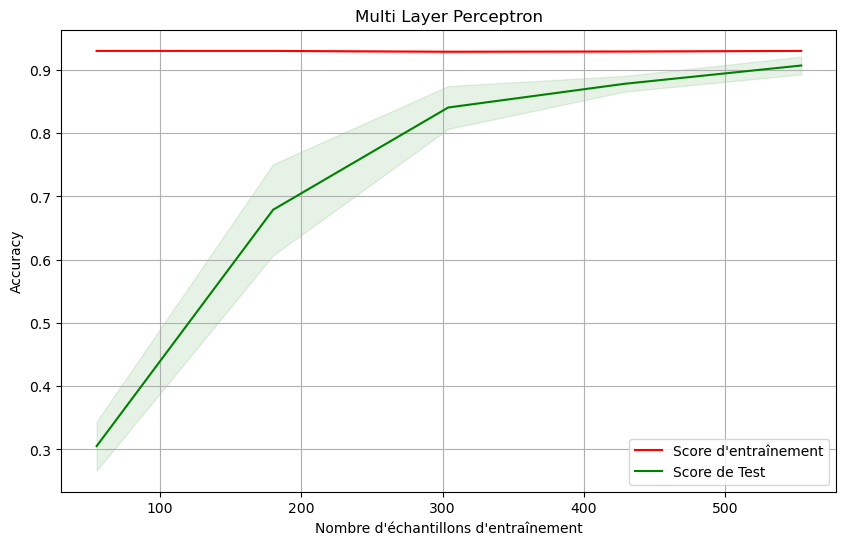

Accuracy(train): 0.9299999999999999
Accuracy: 0.8996969696969697
Precision: 0.9774410774410774
Recall: 0.9696969696969698
F1 Score: 0.9682780182780183


In [78]:
# Définir vos paramètres
alpha_range = np.logspace(-7, -3, num=10)
cv_range = [3, 5]

# Instancier la classe MLPClassifierCVFeatureSelection
feature_selection_class = MLPClassifierCVFeatureSelection(alpha_range, cv_range)

# Appliquer StandardScaler pour mettre à l'échelle les caractéristiques
scaler = StandardScaler()
XTrain_scaled = scaler.fit_transform(XTrain)
XTest_scaled = scaler.transform(XTest)

# Appeler la recherche sur grille
best_params, best_cv_score = feature_selection_class.grid_search(XTrain_scaled, YTrain)

# Afficher les meilleurs paramètres et le meilleur score de validation croisée
print("Meilleurs paramètres :", best_params)
print("Meilleur score de validation croisée :", best_cv_score)

# Instancier le classificateur MLP avec les meilleurs paramètres
best_alpha = best_params["alpha"]
best_architecture = best_params["architecture"]
best_activation = best_params["activation"]
best_clf = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=best_architecture, activation=best_activation)

# Adapter le modèle aux données d'entraînement avec les meilleurs paramètres
best_clf.fit(XTrain_scaled, YTrain)

# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 5)
feature_selection_class.plot_learning_curve(XTrain_scaled, YTrain, train_sizes)
plt.savefig('./Plots/plotFS5.png')
plt.show()

XTrain_scaled = scaler.transform(XTrain)
y_pred_train = best_clf.predict(XTrain_scaled)
accuracy_train = accuracy_score(YTrain, y_pred_train)
print("Accuracy(train):", accuracy_train)
train_fs.append(accuracy_train)

# Appliquer le modèle sur les données de test mises à l'échelle
XTest_scaled = scaler.transform(XTest)
y_pred = best_clf.predict(XTest_scaled)

# Calculer les métriques sur les données de test
accuracy_test = accuracy_score(YTest, y_pred)
precision_test = precision_score(YTest, y_pred, average='macro')
recall_test = recall_score(YTest, y_pred, average='macro')
f1_test = f1_score(YTest, y_pred, average='macro')

# Ajouter les résultats au tableau
accuracy_values_fs.append(accuracy_test)
precision_values_fs.append(precision_test)
recall_values_fs.append(recall_test)
f1_values_fs.append(f1_test)

print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


## QDA

In [ ]:
from Classifiers.QDA import QDABaggingWithCrossValidationGridSearch
from Classifiers.QDA import PCAandQDABaggingWithCrossValidationGridSearch
from Classifiers.QDA import ForwardSelectionQDA

- QDA en utilisant la Validation Croisée et la Recherche sur Grille

Best number of folds for cross-validation: 7
Accuracy(train): 0.024531024531024532
Test Accuracy: 0.020202020202020204


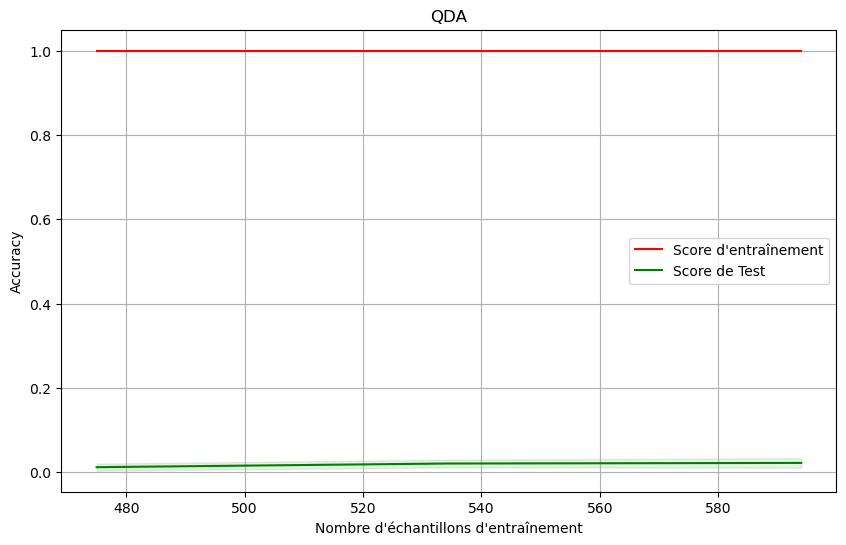

Best hyperparameters: {'reg_param': 0.0}
Best cross-validation score: 0.015869043895318527
Accuracy: 0.020202020202020204
Précision : 0.032914986777647724
Recall : 0.020202020202020204
Score F1 : 0.018208721598552108


In [80]:
# Instancier QDABaggingWithCrossValidationGridSearch
qda_bagging = QDABaggingWithCrossValidationGridSearch(n_jobs=-1, scoring="accuracy", cv_range=[5, 10, 15])

# Trouver le meilleur nombre de plis pour la validation croisée
best_num_folds = qda_bagging.find_best_num_folds(XTrain, YTrain)
print(f"Best number of folds for cross-validation: {best_num_folds}")

# Adapter le modèle avec la validation croisée
qda_bagging.fit(XTrain, YTrain, cv=best_num_folds)
accuracy = qda_bagging.get_accuracy()

print(f"Accuracy(train): {accuracy}")
train.append(accuracy)
# Adapter le modèle QDA sur l'ensemble d'entraînement complet
qda_bagging.qda.fit(XTrain, YTrain)


# Évaluer le modèle sur l'ensemble de test
YTest_pred = qda_bagging.qda.predict(XTest)
test_accuracy = qda_bagging.qda.score(XTest, YTest)
print("Test Accuracy:", test_accuracy)

# Calculer la précision, le rappel et le score F1
precision = precision_score(YTest, YTest_pred, average='macro')
recall = recall_score(YTest, YTest_pred, average='macro')
f1 = f1_score(YTest, YTest_pred, average='macro')

# Ajouter les résultats au tableau
accuracy_values.append(test_accuracy)
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)

# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 10)
qda_bagging.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plot6.png')
plt.show()

# Effectuer une recherche sur grille pour l'ajustement des hyperparamètres
best_params, best_score = qda_bagging.grid_search(XTrain, YTrain)
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Imprimer la précision sur les données de test
print("Accuracy:", test_accuracy)
print(f"Précision : {precision}")
print(f"Recall : {recall}")
print(f"Score F1 : {f1}")

- QDA en utilisant le PCA

Best number of folds for cross-validation: 7
Accuracy(train): 0.05194805194805195


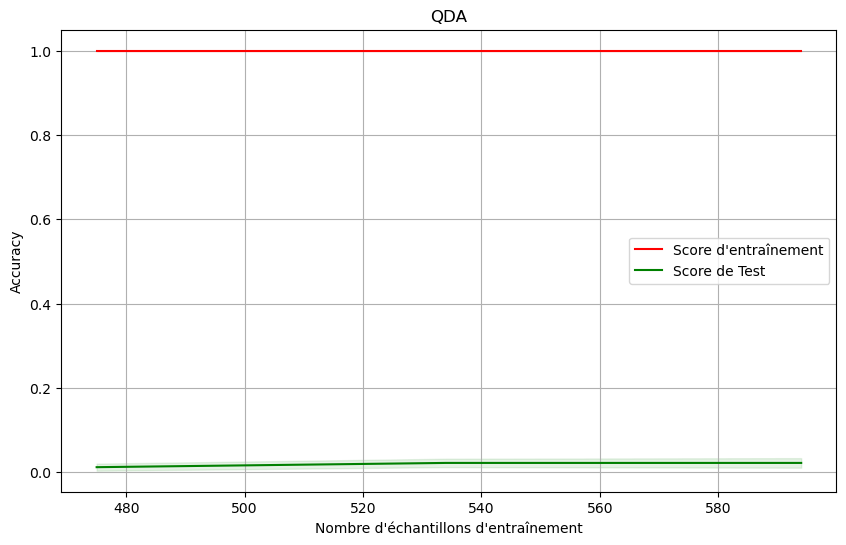

Best PCA parameters: {'n_components': 10}, Best PCA cross-validation score: nan
Best QDA parameters: {'reg_param': 0.0}, Best QDA cross-validation score: 0.06637806637806638
Test Accuracy: 0.04377104377104377


In [81]:
# Instancier PCAandQDABaggingWithCrossValidationGridSearch
pca_qda_bagging = PCAandQDABaggingWithCrossValidationGridSearch(n_jobs=-1, scoring="accuracy", cv_range=[5, 10, 15])

# Trouver le meilleur nombre de plis pour la validation croisée
best_num_folds = pca_qda_bagging.find_best_num_folds(XTrain, YTrain)
print(f"Best number of folds for cross-validation: {best_num_folds}")

# Adapter le modèle avec la validation croisée
pca_qda_bagging.fit(XTrain, YTrain, cv=best_num_folds)
accuracy = pca_qda_bagging.get_accuracy()
print(f"Accuracy(train): {accuracy}")
train_pca.append(accuracy)

# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 10)
pca_qda_bagging.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plotPCA6.png')
plt.show()

# Effectuer une recherche sur grille pour l'ajustement des hyperparamètres
best_pca, best_qda, pca_params, pca_score, qda_params, qda_score = pca_qda_bagging.grid_search(XTrain, YTrain, num_folds=best_num_folds)
print(f"Best PCA parameters: {pca_params}, Best PCA cross-validation score: {pca_score}")
print(f"Best QDA parameters: {qda_params}, Best QDA cross-validation score: {qda_score}")

# Adapter les modèles PCA et QDA sur l'ensemble d'entraînement complet
pca_qda_bagging.pca.fit(XTrain)
pca_XTrain = pca_qda_bagging.pca.transform(XTrain)
pca_qda_bagging.qda.fit(pca_XTrain, YTrain)

# Transformer l'ensemble de test en utilisant PCA
pca_XTest = pca_qda_bagging.pca.transform(XTest)

# Évaluer le modèle sur l'ensemble de test
YTest_pred = pca_qda_bagging.qda.predict(pca_XTest)
test_accuracy = pca_qda_bagging.qda.score(pca_XTest, YTest)
print("Test Accuracy:", test_accuracy)

# Calculer la précision, le rappel et le score F1
precision_test = precision_score(YTest, YTest_pred, average='macro')
recall_test = recall_score(YTest, YTest_pred, average='macro')
f1_test = f1_score(YTest, YTest_pred, average='macro')

# Ajouter les résultats au tableau
accuracy_values_pca.append(test_accuracy)
precision_values_pca.append(precision_test)
recall_values_pca.append(recall_test)
f1_values_pca.append(f1_test)


- QDA en utilisant Forward Selection

Best number of folds for cross-validation: 7
Accuracy(train): 0.06640600563027839
Best number of features: 5


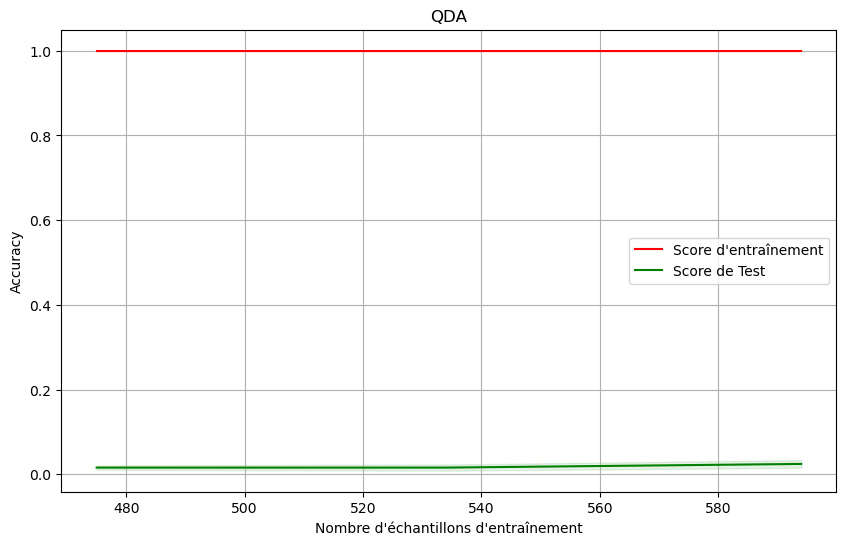

Best QDA parameters: {'reg_param': 0.0}
Best cross-validation score: 0.015869043895318527
Test Accuracy: 0.020202020202020204


In [82]:
# Instancier ForwardSelectionQDA
forward_selection_qda = ForwardSelectionQDA(n_jobs=-1, scoring="accuracy", cv_range=[5, 10, 15])

# Trouver le meilleur nombre de plis pour la validation croisée
best_num_folds = forward_selection_qda.find_best_num_folds(XTrain, YTrain)
print(f"Best number of folds for cross-validation: {best_num_folds}")

# Adapter le modèle avec la validation croisée
forward_selection_qda.fit(XTrain, YTrain)
accuracy = forward_selection_qda.get_accuracy()
best_num_features = forward_selection_qda.get_best_num_features()

print(f"Accuracy(train): {accuracy}")
print(f"Best number of features: {best_num_features}")
train_fs.append(accuracy)
# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 10)
forward_selection_qda.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plotFS6.png')

# Display the plot
plt.show()


# Effectuer une recherche sur grille pour l'ajustement des hyperparamètres
best_params, best_score = forward_selection_qda.grid_search(XTrain, YTrain)
print(f"Best QDA parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Adapter le modèle QDA sur l'ensemble d'entraînement complet
forward_selection_qda.qda.fit(XTrain, YTrain)

# Évaluer le modèle sur l'ensemble de test
YTest_pred = forward_selection_qda.qda.predict(XTest)
test_accuracy = forward_selection_qda.qda.score(XTest, YTest)
print("Test Accuracy:", test_accuracy)

# Calculer la précision, le rappel et le score F1
precision_test = precision_score(YTest, YTest_pred, average='macro')
recall_test = recall_score(YTest, YTest_pred, average='macro')
f1_test = f1_score(YTest, YTest_pred, average='macro')

# Ajouter les résultats au tableau
accuracy_values_fs.append(test_accuracy)
precision_values_fs.append(precision_test)
recall_values_fs.append(recall_test)
f1_values_fs.append(f1_test)


## Logistic Regression

In [83]:
from Classifiers.Regression_logistique import LogisticRegressionWithCrossValidationGridSearch
from Classifiers.Regression_logistique import PCAandLogisticRegressionWithCrossValidationGridSearch
from Classifiers.Regression_logistique import ForwardSelectionLogisticRegressionWithCrossValidationGridSearch

- Regression logistique en utilisant la Validation Croisée et la Recherche sur Grille

Best number of folds for cross-validation: 7


Accuracy(train):  0.7341269841269841


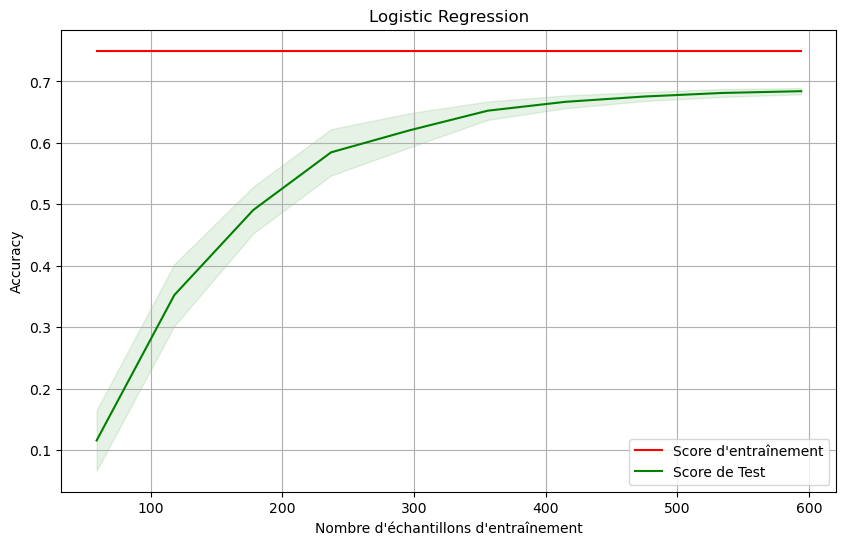

Best hyperparameters: {'C': 0.5}
Best cross-validation score: 0.9841269841269842
Test Accuracy: 0.6831649831649831


In [85]:
# Instantiate LogisticRegressionWithCrossValidationGridSearch
logreg_cv = LogisticRegressionWithCrossValidationGridSearch(n_jobs=-1, scoring="accuracy", cv_range=[5, 10, 15])
 
# Find the best number of folds for cross-validation
best_num_folds = logreg_cv.find_best_num_folds(XTrain, YTrain)
print(f"Best number of folds for cross-validation: {best_num_folds}")
 
# Fit the model with cross-validation
logreg_cv.fit(XTrain, YTrain, cv=best_num_folds)
accuracy = logreg_cv.get_accuracy()
print("Accuracy(train): " ,accuracy)
train.append(accuracy)
# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
logreg_cv.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plot7.png')
plt.show()
 
# Perform grid search for hyperparameter tuning
best_params, best_score = logreg_cv.grid_search(XTrain, YTrain)
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")
 
# Evaluate the model on the test set
XTest_scaled = logreg_cv.scaler.transform(XTest)  # Apply StandardScaler to the test set
YTest_pred = logreg_cv.logreg.predict(XTest_scaled)
test_accuracy = logreg_cv.logreg.score(XTest_scaled, YTest)
print("Test Accuracy:", test_accuracy)
 
# Calculate precision, recall, and F1 score
precision_test = precision_score(YTest, YTest_pred, average='macro')
recall_test = recall_score(YTest, YTest_pred, average='macro')
f1_test = f1_score(YTest, YTest_pred, average='macro')
 
# Add results to the table
accuracy_values.append(test_accuracy)
precision_values.append(precision_test)
recall_values.append(recall_test)
f1_values.append(f1_test)
 

- Regression logistique en utilisant le PCA

Best number of folds for cross-validation: 7
Accuracy(train) 0.7855699855699856


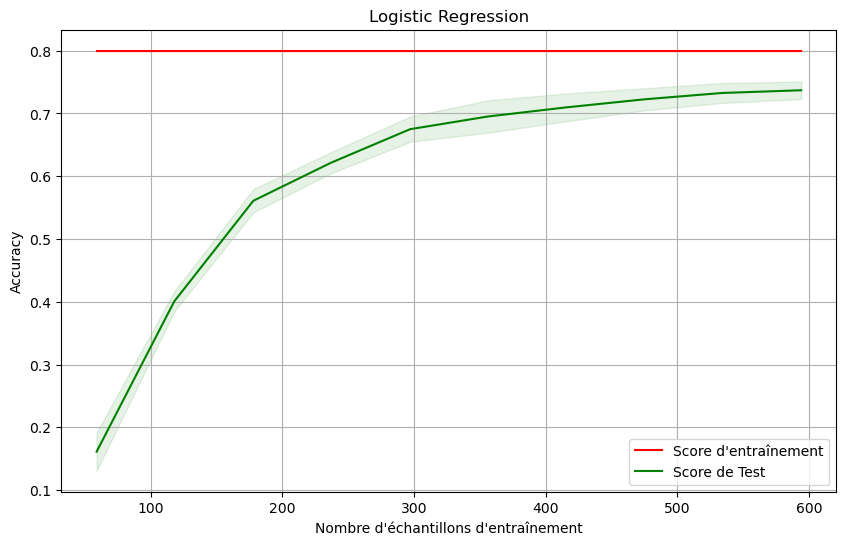

Best PCA parameters: {'n_components': 100}, Best PCA cross-validation score: nan
Best Logistic Regression parameters: {'C': 0.5}, Best Logistic Regression cross-validation score: 0.9841269841269842
Test Accuracy: 0.7297979797979798


In [86]:
# Instantiate PCAandLogisticRegressionWithCrossValidationGridSearch
pca_logreg_cv = PCAandLogisticRegressionWithCrossValidationGridSearch(n_jobs=-1, scoring="accuracy", cv_range=[5, 10, 15])
 
# Find the best number of folds for cross-validation
best_num_folds = pca_logreg_cv.find_best_num_folds(XTrain, YTrain)
print(f"Best number of folds for cross-validation: {best_num_folds}")
 
# Fit the model with cross-validation
pca_logreg_cv.fit(XTrain, YTrain, cv=best_num_folds)
accuracy = pca_logreg_cv.get_accuracy()
print("Accuracy(train)",accuracy)
train_pca.append(accuracy)
# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
pca_logreg_cv.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plotPCA7.png')
plt.show()
 
# Perform grid search for hyperparameter tuning
best_pca, best_logreg, pca_params, pca_score, logreg_params, logreg_score = pca_logreg_cv.grid_search(XTrain, YTrain)
print(f"Best PCA parameters: {pca_params}, Best PCA cross-validation score: {pca_score}")
print(f"Best Logistic Regression parameters: {logreg_params}, Best Logistic Regression cross-validation score: {logreg_score}")
 
# Fit the best PCA to the training data and transform the test data
X_pca_test = best_pca.transform(pca_logreg_cv.scaler.transform(XTest))
 
# Use the Logistic Regression model
test_accuracy = best_logreg.score(X_pca_test, YTest)
print("Test Accuracy:", test_accuracy)
 
# Calculate precision, recall, and F1 score
YTest_pred = best_logreg.predict(X_pca_test)
precision_test = precision_score(YTest, YTest_pred, average='macro')
recall_test = recall_score(YTest, YTest_pred, average='macro')
f1_test = f1_score(YTest, YTest_pred, average='macro')
 
# Add results to the table
accuracy_values_pca.append(test_accuracy)
precision_values_pca.append(precision_test)
recall_values_pca.append(recall_test)
f1_values_pca.append(f1_test)

- Regression logistique en utilisant Forward Selection

Best number of folds for cross-validation: 7
Accuracy(train):  0.7170295068293192
Best number of features: 162
Test Accuracy: 0.6464309764309764
Test Precision: 0.6923232323232325
Test Recall: 0.6864309764309764
Test F1 Score: 0.6857575757575758


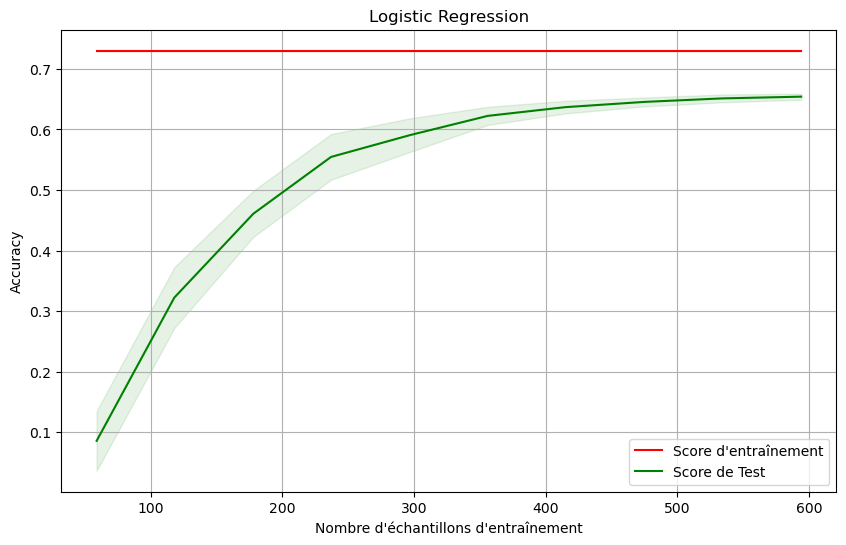

Best hyperparameters: {'C': 0.5}
Best cross-validation score: 0.9841269841269842


In [87]:
# Instantiate LogisticRegressionWithForwardSelection
logreg_forward_selection = LogisticRegressionWithForwardSelection(
    n_jobs=-1, scoring="accuracy", cv_range=[5, 10, 15]
)

# Find the best number of folds for cross-validation
best_num_folds = logreg_forward_selection.find_best_num_folds(XTrain, YTrain)
print(f"Best number of folds for cross-validation: {best_num_folds}")

# Fit the model with cross-validation and forward selection
logreg_forward_selection.fit(XTrain, YTrain, cv=best_num_folds)
accuracy = logreg_forward_selection.get_accuracy()
best_num_features = logreg_forward_selection.get_best_num_features()

print("Accuracy(train): ",accuracy)
print(f"Best number of features: {best_num_features}")
train_fs.append(accuracy)
# Apply the same feature selection to the test set
XTest_selected = XTest[:, :best_num_features]

# Evaluate the model on the test set
XTest_selected_scaled = logreg_forward_selection.scaler.transform(XTest_selected)
test_accuracy = logreg_forward_selection.logreg.score(XTest_selected_scaled, YTest)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, and F1 score
YTest_pred = logreg_forward_selection.logreg.predict(XTest_selected_scaled)
precision_test = precision_score(YTest, YTest_pred, average='macro')
recall_test = recall_score(YTest, YTest_pred, average='macro')
f1_test = f1_score(YTest, YTest_pred, average='macro')

# Add results to the table
accuracy_values_fs.append(test_accuracy)
precision_values_fs.append(precision_test)
recall_values_fs.append(recall_test)
f1_values_fs.append(f1_test)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
logreg_forward_selection.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plotFS7.png')
plt.show()

# Perform grid search for hyperparameter tuning
best_params, best_score = logreg_forward_selection.grid_search(XTrain, YTrain)
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")


## AdaBoost

In [ ]:
from Classifiers.AdaBoost import AdaBoostWithCrossValidationGridSearch
from Classifiers.AdaBoost import PCAandAdaBoostWithCrossValidationGridSearch
from Classifiers.AdaBoost import AdaBoostWithForwardSelectionAndGridSearch

- AdaBoost en utilisant la Validation Croisée et la Recherche sur Grille

Meilleur Nombre de Plis pour la Validation Croisée : 5
Meilleurs Paramètres : {'base_estimator__max_depth': 2, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 70}
Meilleur Score de Validation Croisée : 0.49778959441142734


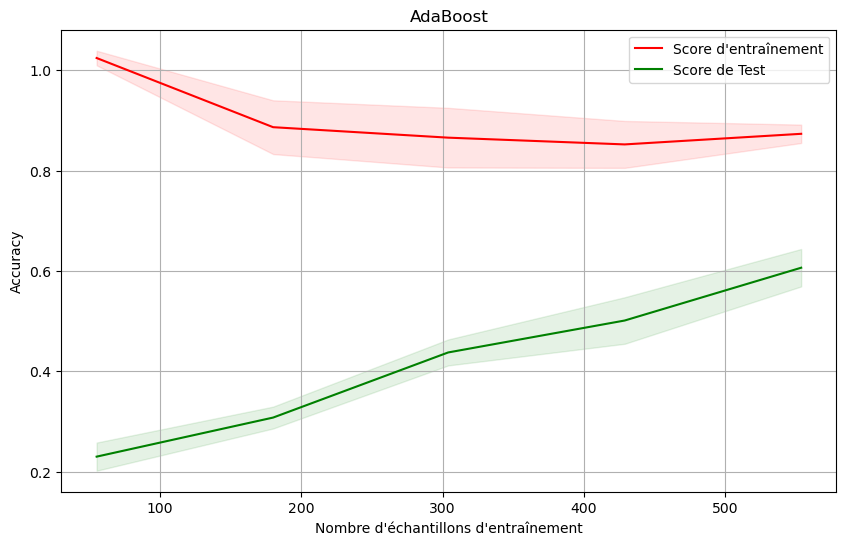

Accuracy(train): 0.8253968253968254
Accuracy(test): 0.5925925925925926
Précision : 0.6791775129295065
Recall : 0.5925925925925926
Score F1 : 0.5900734196986189


In [89]:
# Create an instance of the AdaBoostWithCrossValidationGridSearch class
ada_cv = AdaBoostWithCrossValidationGridSearch()

# Define the range of cross-validation folds
cv_range = [3, 5]  # Customize the range as needed

# Find the best number of folds for cross-validation
cv = ada_cv.find_best_num_folds(XTrain, YTrain, cv_range)
print("Meilleur Nombre de Plis pour la Validation Croisée :", cv)

# Perform grid search with the best number of folds
best_params, best_score = ada_cv.grid_search(XTrain, YTrain, cv=cv)
print("Meilleurs Paramètres :", best_params)
print("Meilleur Score de Validation Croisée :", best_score)

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
ada_cv.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plot8.png')
plt.show()  # Display the plot

# Fit the model with the best parameters on the entire training set
ada_cv.ada_boost.fit(XTrain, YTrain)
train_accuracy = ada_cv.ada_boost.score(XTrain, YTrain)
print("Accuracy(train):", train_accuracy)
train.append(train_accuracy)

# Evaluate the model on the test set
test_accuracy = ada_cv.ada_boost.score(XTest, YTest)
print("Accuracy(test):", test_accuracy)

# Make predictions on the test set
YTest_pred = ada_cv.ada_boost.predict(XTest)

# Calculate and display precision, recall, and F1 score
precision = precision_score(YTest, YTest_pred, average='macro')
recall = recall_score(YTest, YTest_pred, average='macro')
f1 = f1_score(YTest, YTest_pred, average='macro')

# Add the results to the table
accuracy_values.append(test_accuracy)
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)

print("Précision :", precision)
print("Recall :", recall)
print("Score F1 :", f1)


- AdaBoost en utilisant le PCA

Meilleur Nombre de Plis pour la Validation Croisée : 5
Meilleurs Paramètres : {'adaboostclassifier__base_estimator__max_depth': 2, 'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 70, 'pca__n_components': 20}
Meilleur Score de Validation Croisée : 0.5613596079658013


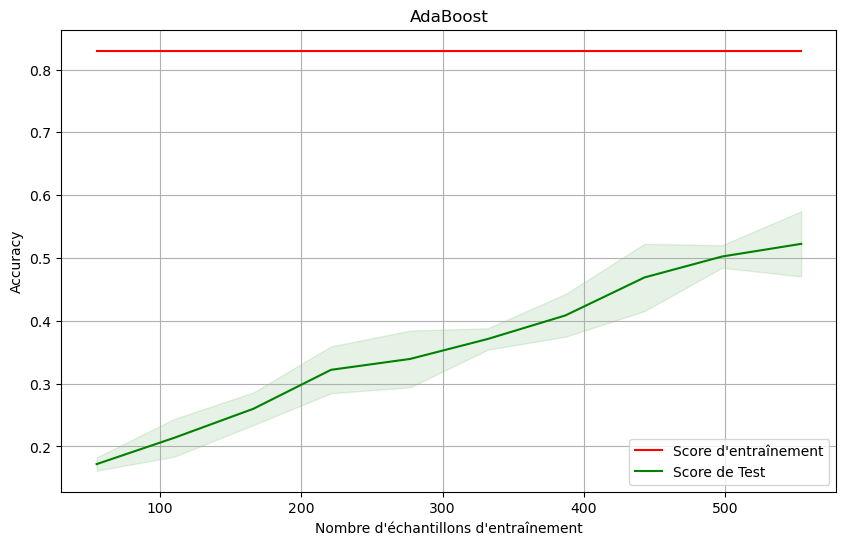

Accuracy(train): 0.7604617604617605
Accuracy: 0.5656565656565656
Précision : 0.6413933429084944
Recall : 0.5656565656565656
Score F1 : 0.5543108687048081


In [90]:
# Créer une instance de la classe AdaBoostWithCrossValidationGridSearch
ada_cv = PCAAdaBoostWithCrossValidationGridSearch()
 
# Définir la plage de plis de validation croisée
cv_range = [3, 5] 
 
# Trouver le meilleur nombre de plis pour la validation croisée
cv = ada_cv.find_best_num_folds(XTrain, YTrain, cv_range)
print("Meilleur Nombre de Plis pour la Validation Croisée :", cv)
 
# Effectuer une recherche en grille avec le meilleur nombre de plis
best_params, best_score = ada_cv.grid_search(XTrain, YTrain, cv=cv)
print("Meilleurs Paramètres :", best_params)
print("Meilleur Score de Validation Croisée :", best_score)
 
# Tracer la courbe d'apprentissage
ada_cv.plot_learning_curve(XTrain, YTrain, cv)
plt.savefig('./Plots/plotPCA8.png')
plt.show()  # Afficher le graphique
 
# Ajuster le modèle avec les meilleurs paramètres sur l'ensemble d'entraînement complet
ada_cv.ada_boost.fit(XTrain, YTrain)
train_accuracy = ada_cv.ada_boost.score(XTrain, YTrain)
print("Accuracy(train):", train_accuracy)
train_pca.append(train_accuracy)

# Évaluer le modèle sur l'ensemble de test
test_accuracy = ada_cv.ada_boost.score(XTest, YTest)
print("Accuracy:", test_accuracy)
# Faire des prédictions sur l'ensemble de test
YTest_pred = ada_cv.ada_boost.predict(XTest)
 
# Calculer et afficher la précision, le rappel et le score F1
precision = precision_score(YTest, YTest_pred, average='macro')
recall = recall_score(YTest, YTest_pred, average='macro')  
f1 = f1_score(YTest, YTest_pred, average='macro')  
 
 
# Add the results to the table
accuracy_values_pca.append(test_accuracy)
precision_values_pca.append(precision)
recall_values_pca.append(recall)
f1_values_pca.append(f1)

print("Précision :", precision)
print("Recall :", recall)
print("Score F1 :", f1)


- AdaBoost en utilisant Forward Selection


Meilleurs Paramètres pour AdaBoost avec 3 plis : {'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.5, 'n_estimators': 50}
Meilleur Score de Validation Croisée pour AdaBoost avec 3 plis : 0.5757575757575758

Meilleurs Paramètres pour AdaBoost avec 5 plis : {'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.1, 'n_estimators': 100}
Meilleur Score de Validation Croisée pour AdaBoost avec 5 plis : 0.597309978104473

Accuracy(train) with the best model: 0.35


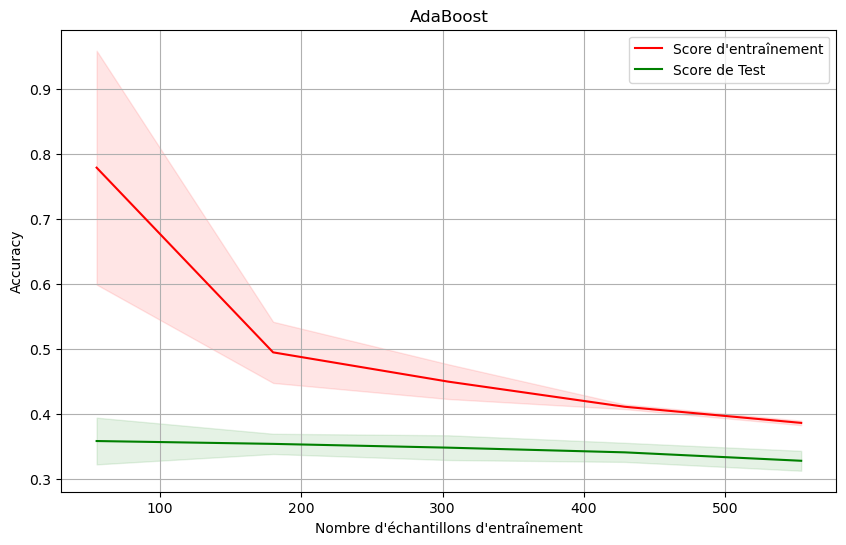

Accuracy on the test set with the best model: 0.30000000000000004

Précision (AdaBoost) avec le meilleur modèle : 0.6816738816738817
Recall (AdaBoost) avec le meilleur modèle : 0.6397306397306397
Score F1 (AdaBoost) avec le meilleur modèle : 0.6216450216450216


In [91]:
# Create an instance of the class AdaBoostWithForwardSelectionAndGridSearch
forward_selection_ada_cv = AdaBoostWithForwardSelectionAndGridSearch()

# Example usage with different numbers of folds for cross-validation
cv_values = [3,5]

best_ada = None
best_ada_params = None
best_ada_score = float('-inf')  # Initialize with negative infinity

for cv in cv_values:
    # Perform grid search with the specified number of folds
    current_ada, current_ada_params, current_ada_score = forward_selection_ada_cv.grid_search(XTrain, YTrain, cv=cv)
    
    # Display results for each number of folds
    print(f"\nMeilleurs Paramètres pour AdaBoost avec {cv} plis :", current_ada_params)
    print(f"Meilleur Score de Validation Croisée pour AdaBoost avec {cv} plis :", current_ada_score)

    # Update the best model if the current model has a higher validation score
    if current_ada_score > best_ada_score:
        best_ada = current_ada
        best_ada_params = current_ada_params
        best_ada_score = current_ada_score

# Display the learning curve plot for the best model
if best_ada is not None:
    # Fit the best model on the entire training set
    best_ada.fit(XTrain, YTrain)

    # Display the accuracy on the entire training set
    test_accuracy_ada_train = best_ada.score(XTrain, YTrain)
    print("\nAccuracy(train) with the best model:", test_accuracy_ada_train)
    train_fs.append(test_accuracy_ada_train)

    # Plot learning curve for the best model
    forward_selection_ada_cv.plot_learning_curve(XTrain, YTrain, cv)
    
    # Save the plot to a file
    plt.savefig('./Plots/plotFS8.png')
    
    # Show the plot
    plt.show()

    # Evaluate the best model on the test set
    train_accuracy_ada = best_ada.score(XTrain, YTrain)
    print("Accuracy on the test set with the best model:", train_accuracy_ada)

    # Calculate and display precision, recall, and F1 score for the best model
    YTest_pred_ada = best_ada.predict(XTest)
    precision_ada = precision_score(YTest, YTest_pred_ada, average='macro')
    recall_ada = recall_score(YTest, YTest_pred_ada, average='macro')
    f1_ada = f1_score(YTest, YTest_pred_ada, average='macro')
    
    accuracy_values_fs.append(train_accuracy_ada)
    precision_values_fs.append(precision_ada)
    recall_values_fs.append(recall_ada)
    f1_values_fs.append(f1_ada)

    print("\nPrécision (AdaBoost) avec le meilleur modèle :", precision_ada)
    print("Recall (AdaBoost) avec le meilleur modèle :", recall_ada)
    print("Score F1 (AdaBoost) avec le meilleur modèle :", f1_ada)


## Random Forest

In [ ]:
from Classifiers.Random_forest import RandomForestWithCrossValidationGridSearch
from Classifiers.Random_forest import PCAandRandomForestWithCrossValidationGridSearch
from Classifiers.Random_forest import RandomForestWithForwardSelectionAndGridSearch

- Random Forest en utilisant la Validation Croisée et la Recherche sur Grille

Best Number of Folds for Cross-Validation: 5
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score for Random Forest: 0.9696799082473152


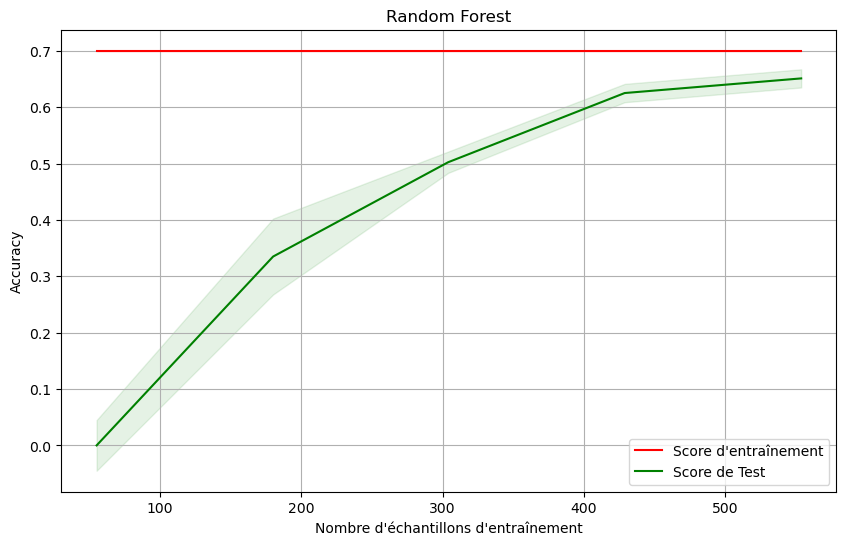

Accuracy(train): 0.7
Accuracy: 0.6528619528619528
Precision: 0.664983164983165
Recall: 0.6528619528619528
F1 Score: 0.6504088504088505


In [93]:
# Create an instance of the class
rf_cv = RandomForestWithCrossValidationGridSearch()

# Define the range of cross-validation folds
cv_range = [3, 5]  # Customize the range as needed

# Find the best number of folds for cross-validation
best_num_folds = rf_cv.find_best_num_folds(XTrain, YTrain, cv_range)
print("Best Number of Folds for Cross-Validation:", best_num_folds)

# Perform grid search with the best number of folds
best_params, best_score = rf_cv.grid_search(XTrain, YTrain, num_folds=best_num_folds)
print("Best Parameters for Random Forest:", best_params)
print("Best Cross-Validation Score for Random Forest:", best_score)

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
rf_cv.plot_learning_curve(XTrain, YTrain,train_sizes, best_num_folds)
plt.savefig('./Plots/plot9.png')
plt.show()  # Display the plot

# Fit the model with the best parameters on the entire training set
rf_cv.fit(XTrain, YTrain)

# Calculate and display the accuracy on the entire training set
train_accuracy = rf_cv.rf.score(XTrain, YTrain)
print("Accuracy(train):", train_accuracy)
train.append(train_accuracy)

# Evaluate the model on the test set
test_accuracy = rf_cv.rf.score(XTest, YTest)
print("Accuracy:", test_accuracy)

# Make predictions on the test set
YTest_pred = rf_cv.predict(XTest)

# Calculate and display precision, recall, and F1 score
precision = precision_score(YTest, YTest_pred, average='macro')
recall = recall_score(YTest, YTest_pred, average='macro')
f1 = f1_score(YTest, YTest_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Add the test precision to the table
accuracy_values.append(test_accuracy)
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)


- Random Forest en utilisant le PCA

Best number of folds for cross-validation: 5


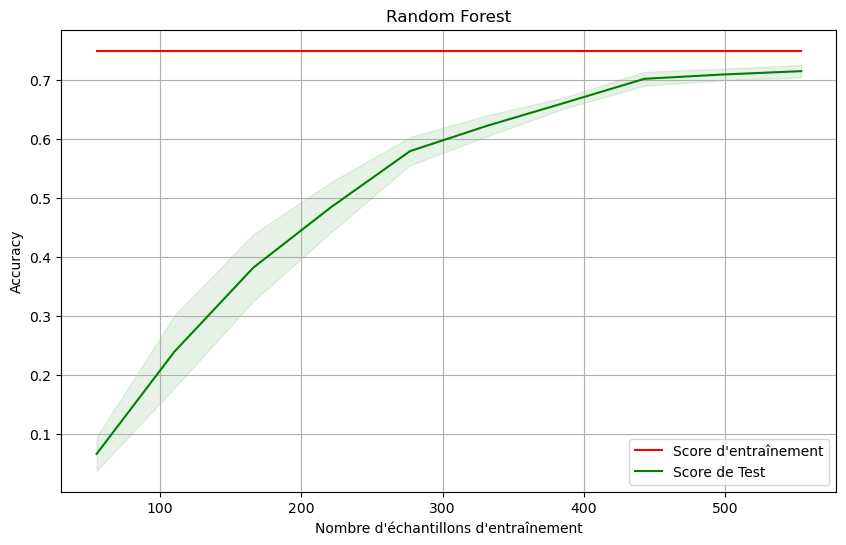

Best PCA parameters: {'n_components': 100}
Best PCA cross-validation score: nan
Best Random Forest parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest cross-validation score: 0.8817120216869982
Accuracy(train): 0.75
Accuracy: 0.6792929292929293


In [94]:
# Instantiate the PCAandRandomForestWithCrossValidationGridSearch
rf_cv = PCAandRandomForestWithCrossValidationGridSearch(n_jobs=-1, scoring="accuracy", cv_range=[3,5])
 
# Find the best number of folds for cross-validation
best_num_folds = rf_cv.find_best_num_folds(XTrain, YTrain)
print(f"Best number of folds for cross-validation: {best_num_folds}")
 
# Fit the model with cross-validation
rf_cv.fit(XTrain, YTrain, cv=best_num_folds)
accuracy = rf_cv.get_accuracy()
 
# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
rf_cv.plot_learning_curve(XTrain, YTrain, train_sizes, cv=best_num_folds)
plt.savefig('./Plots/plotPCA9.png')
plt.show()
 
# Perform grid search for hyperparameter tuning
best_pca, best_rf, best_pca_params, best_pca_score, best_rf_params, best_rf_score = rf_cv.grid_search(XTrain, YTrain)
print(f"Best PCA parameters: {best_pca_params}")
print(f"Best PCA cross-validation score: {best_pca_score}")
print(f"Best Random Forest parameters: {best_rf_params}")
print(f"Best Random Forest cross-validation score: {best_rf_score}")
 
train_accuracy = best_rf.score(best_pca.transform(XTrain), YTrain)
print("Accuracy(train):", train_accuracy)
train_pca.append(train_accuracy)

# Evaluate the model on the test set
YTest_pred = best_rf.predict(best_pca.transform(XTest))
test_accuracy = best_rf.score(best_pca.transform(XTest), YTest)
print("Accuracy:", test_accuracy)
 
# Calculate precision, recall, and F1 scores
precision_test = precision_score(YTest, YTest_pred, average='macro')
recall_test = recall_score(YTest, YTest_pred, average='macro')
f1_test = f1_score(YTest, YTest_pred, average='macro')
 
# Ajouter la précision du test au tableau
accuracy_values_pca.append(test_accuracy)
precision_values_pca.append(precision)
recall_values_pca.append(recall)
f1_values_pca.append(f1)
 

- Random Forest en utilisant Forward Selection

Meilleur Nombre de Plis pour la Validation Croisée : 7
Meilleurs Paramètres pour Random Forest : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur Score de Validation Croisée pour Random Forest : 0.9797979797979798


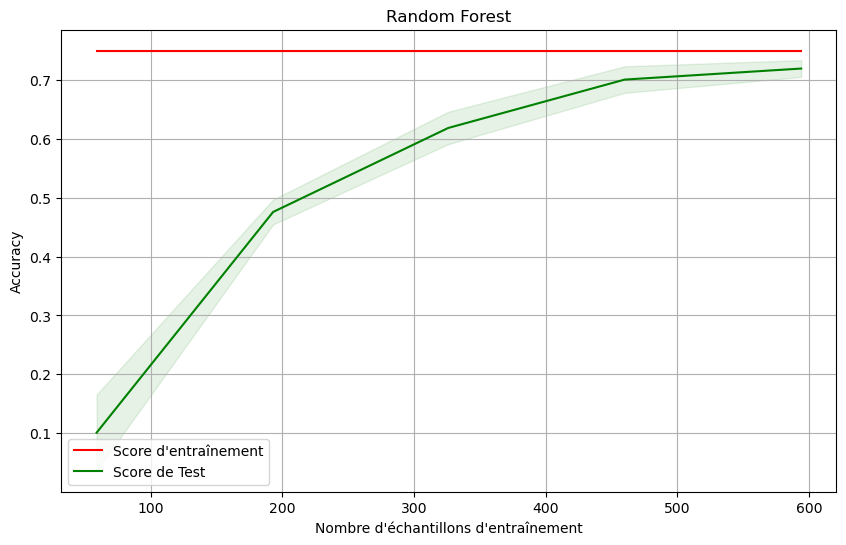

Training Accuracy: 0.75
Accuracy: 0.7264309764309764
Précision : 0.7324915824915825
Recall : 0.7264309764309763
Score F1 : 0.7262145262145262


In [95]:
# Créer une instance de la classe
forward_selection_rf_cv = RandomForestWithForwardSelectionAndGridSearch()

# Définir la plage de plis de validation croisée
cv_range = [3, 5,7]  # Personnalisez la plage selon vos besoins

# Trouver le meilleur nombre de plis pour la validation croisée
best_num_folds = forward_selection_rf_cv.find_best_num_folds(XTrain, YTrain, cv_range)
print("Meilleur Nombre de Plis pour la Validation Croisée :", best_num_folds)

# Effectuer une recherche en grille avec le meilleur nombre de plis
best_rf, best_rf_params, best_rf_score = forward_selection_rf_cv.grid_search(XTrain, YTrain, num_folds=best_num_folds)
print("Meilleurs Paramètres pour Random Forest :", best_rf_params)
print("Meilleur Score de Validation Croisée pour Random Forest :", best_rf_score)

# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 5)
forward_selection_rf_cv.plot_learning_curve(XTrain, YTrain, train_sizes)
plt.savefig('./Plots/plotFS9.png')
plt.show()  # Afficher le graphique

# Ajuster le modèle avec les meilleurs paramètres sur l'ensemble d'entraînement complet
best_rf.fit(XTrain, YTrain)

# Obtenir l'accuracy sur l'ensemble d'entraînement complet après ajustement
train_accuracy_fs = best_rf.score(XTrain, YTrain)
print("Training Accuracy:", train_accuracy_fs)
train_fs.append(train_accuracy_fs)

# Prédire les étiquettes de l'ensemble de test
YTest_pred = best_rf.predict(XTest)

# Évaluer le modèle sur l'ensemble de test
test_accuracy = best_rf.score(XTest, YTest)
print("Accuracy:", test_accuracy)

# Calculer et afficher la précision, le rappel et le score F1
precision = precision_score(YTest, YTest_pred, average='macro') 
recall = recall_score(YTest, YTest_pred, average='macro')  
f1 = f1_score(YTest, YTest_pred, average='macro')  

print("Précision :", precision)
print("Recall :", recall)
print("Score F1 :", f1)

# Ajouter la précision du test au tableau
accuracy_values_fs.append(test_accuracy)
precision_values_fs.append(precision)
recall_values_fs.append(recall)
f1_values_fs.append(f1)

## KNN

In [ ]:
from Classifiers.KNN import KNNWithCrossValidationGridSearch
from Classifiers.KNN import PCAandKNNWithCrossValidationGridSearch
from Classifiers.KNN import KNNWithCrossValidationGridSearchandFS

- KNN en utilisant la Validation Croisée et la Recherche sur Grille

Meilleur Nombre de Plis : 5
Training Accuracy: 0.9783549783549783


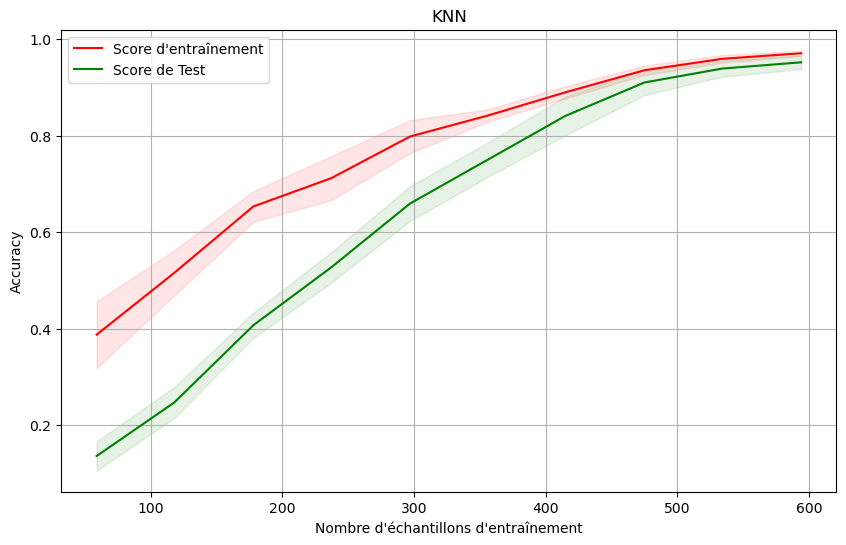

Accuracy: 0.948065895109999
Precision: 0.9327946127946127
Recall: 0.9474747474747474
F1 Score: 0.9324001924001923


In [96]:
# Instanciation de la classe KNNWithCrossValidationGridSearch
knn_model = KNNWithCrossValidationGridSearch()

# Spécification d'une plage de plis pour la validation croisée à essayer
cv_range = [3, 5, 7]

# Trouver le meilleur nombre de plis dans la plage spécifiée
best_num_folds = knn_model.find_best_num_folds(XTrain, YTrain, cv_range)
print(f'Meilleur Nombre de Plis : {best_num_folds}')

# Effectuer une recherche de grille pour KNN
best_knn, knn_params, knn_score = knn_model.grid_search(XTrain, YTrain, num_folds=best_num_folds)

# Ajuster le modèle avec les meilleurs paramètres de KNN
knn_model.fit(XTrain, YTrain, num_folds=best_num_folds)
train_accuracy_knn = knn_model.get_train_accuracy()
print("Training Accuracy:", train_accuracy_knn)
train.append(train_accuracy_knn)

# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 10)
knn_model.plot_learning_curve(XTrain, YTrain, train_sizes)

# Afficher le graphique
plt.savefig('./Plots/plot10.png')
plt.show()

accuracy = knn_model.get_accuracy()
precision = knn_model.get_precision()
recall = knn_model.get_recall()
f1 = knn_model.get_f1()

# Ajouter les résultats au tableau
accuracy_values.append(accuracy)
precision_values.append(precision)
recall_values.append(recall)
f1_values.append(f1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


- KNN en utlisant l'ACP


Meilleur Nombre de Plis : 5
Training Accuracy: 0.9696969696969697


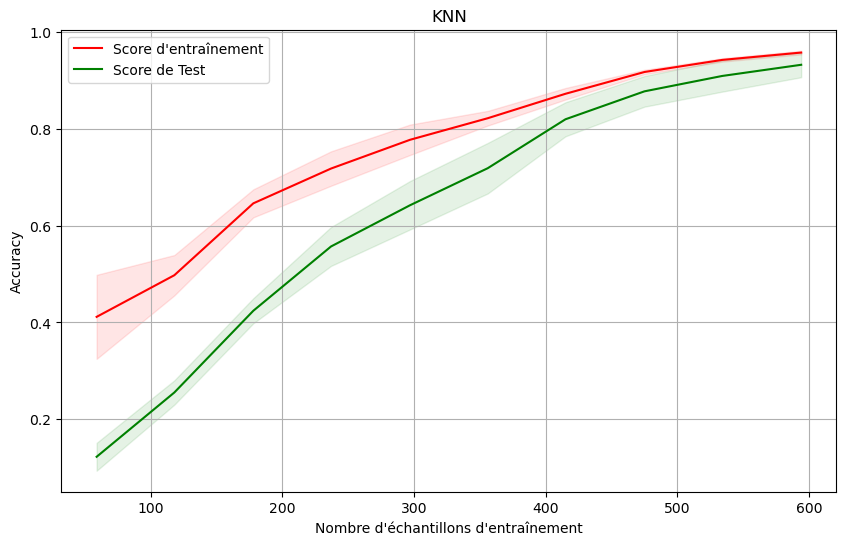

Accuracy: 0.9177979355645917
Precision: 0.898989898989899
Recall: 0.9191919191919192
F1 Score: 0.897777777777778


In [97]:
# Instanciation de la classe PCAandKNNWithCrossValidationGridSearch
pca_knn_model = PCAandKNNWithCrossValidationGridSearch()

# Spécification d'une plage de plis pour la validation croisée à essayer
cv_range = [3, 5, 7]

# Trouver le meilleur nombre de plis dans la plage spécifiée
best_num_folds = pca_knn_model.find_best_num_folds(XTrain, YTrain, cv_range)
print(f'Meilleur Nombre de Plis : {best_num_folds}')

# Effectuer une recherche de grille pour PCA et KNN
best_pca, best_knn, pca_params, pca_score, knn_params, knn_score = pca_knn_model.grid_search(XTrain, YTrain, num_folds=best_num_folds)

# Ajuster le modèle avec les meilleurs paramètres de PCA et KNN
pca_knn_model.fit(XTrain, YTrain, num_folds=best_num_folds)
train_accuracy_pca_knn = pca_knn_model.get_train_accuracy()
print("Training Accuracy:", train_accuracy_pca_knn)
train_pca.append(train_accuracy_pca_knn)

# Tracer la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 10)
pca_knn_model.plot_learning_curve(XTrain, YTrain, train_sizes)

# Afficher le graphique
plt.savefig('./Plots/plotPCA10.png')
plt.show()

accuracy = pca_knn_model.get_accuracy()
precision = pca_knn_model.get_precision()
recall = pca_knn_model.get_recall()
f1 = pca_knn_model.get_f1()

# Ajouter les résultats au tableau
accuracy_values_pca.append(accuracy)
precision_values_pca.append(precision)
recall_values_pca.append(recall)
f1_values_pca.append(f1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


- KNN en utlisant Forward Selection

Best Number of Folds: 5
Train Accuracy: 0.7183442810968615


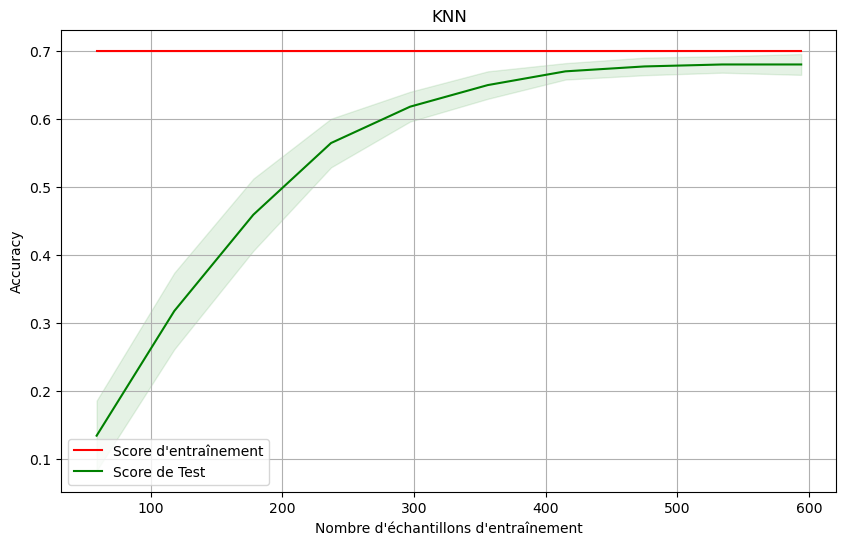

Accuracy:  0.6783442810968616
Precision: 0.6707070707070708
Recall: 0.6767676767676769
F1 Score: 0.6706397306397307


In [98]:
# Instantiate the class KNNWithForwardSelection
knn_model_forward_selection = KNNWithForwardSelection()

# Specify a range of folds for cross-validation to try
cv_range = [3, 5, 7]

# Find the best number of folds in the specified range
best_num_folds_knn = knn_model_forward_selection.find_best_num_folds(XTrain, YTrain, cv_range)
print(f"Best Number of Folds: {best_num_folds_knn}")

# Perform grid search for KNN
best_knn, knn_params, knn_score = knn_model_forward_selection.grid_search(XTrain, YTrain, num_folds=best_num_folds_knn)

# Fit the model with forward selection
knn_model_forward_selection.fit(XTrain, YTrain, num_folds=best_num_folds_knn)
train_accuracy_knn = knn_model_forward_selection.get_train_accuracy()
print(f'Train Accuracy:', train_accuracy_knn)
train_fs.append(train_accuracy_knn)

# Plot the learning curve
train_sizes_knn = np.linspace(0.1, 1.0, 10)
knn_model_forward_selection.plot_learning_curve(XTrain, YTrain, train_sizes_knn)

# Display the plot
plt.savefig('./Plots/plotFS10.png')
plt.show()

# Get performance metrics
accuracy_knn = knn_model_forward_selection.get_accuracy()
precision_knn = knn_model_forward_selection.get_precision()
recall_knn = knn_model_forward_selection.get_recall()
f1_knn = knn_model_forward_selection.get_f1()

# Add the results to the table
accuracy_values_fs.append(accuracy_knn)
precision_values_fs.append(precision_knn)
recall_values_fs.append(recall_knn)
f1_values_fs.append(f1_knn)

print(f'Accuracy: ' ,accuracy_knn)
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1 Score: {f1_knn}')


## Final

In [99]:
%store accuracy_values
%store accuracy_values_pca
%store accuracy_values_fs

%store precision_values
%store precision_values_pca
%store precision_values_fs

%store recall_values
%store recall_values_pca
%store recall_values_fs

%store f1_values
%store f1_values_pca
%store f1_values_fs

%store train
%store train_pca
%store train_fs

Stored 'accuracy_values' (list)
Stored 'accuracy_values_pca' (list)
Stored 'accuracy_values_fs' (list)
Stored 'precision_values' (list)
Stored 'precision_values_pca' (list)
Stored 'precision_values_fs' (list)
Stored 'recall_values' (list)
Stored 'recall_values_pca' (list)
Stored 'recall_values_fs' (list)
Stored 'f1_values' (list)
Stored 'f1_values_pca' (list)
Stored 'f1_values_fs' (list)
Stored 'train' (list)
Stored 'train_pca' (list)
Stored 'train_fs' (list)


In [100]:
print(accuracy_values)
print(precision_values)
print(recall_values)
print(f1_values)

[0.9225589225589226, 0.40404040404040403, 0.569023569023569, 0.8754208754208754, 0.923063973063973, 0.020202020202020204, 0.6831649831649831, 0.5925925925925926, 0.6528619528619528, 0.948065895109999]
[0.9447811447811449, 0.3095117845117845, 0.6367083533750201, 0.9082491582491582, 0.9797979797979798, 0.032914986777647724, 0.7873737373737373, 0.6791775129295065, 0.664983164983165, 0.9327946127946127]
[0.9225589225589225, 0.404040404040404, 0.5741341991341992, 0.8754208754208753, 0.9730639730639732, 0.020202020202020204, 0.7831649831649832, 0.5925925925925926, 0.6528619528619528, 0.9474747474747474]
[0.9191919191919192, 0.32647044313710977, 0.5339010035979733, 0.8695286195286196, 0.9722943722943722, 0.018208721598552108, 0.7826839826839826, 0.5900734196986189, 0.6504088504088505, 0.9324001924001923]


In [101]:
print(accuracy_values_fs)
print(precision_values_fs)
print(recall_values_fs)
print(f1_values_fs)


[0.85, 0.6262626262626263, 0.5858585858585859, 0.5723905723905723, 0.8996969696969697, 0.020202020202020204, 0.6464309764309764, 0.35, 0.7264309764309764, 0.6783442810968616]
[0.9447811447811449, 0.6367083533750201, 0.5936227352894019, 0.6073187681883334, 0.9774410774410774, 0.032914986777647724, 0.6923232323232325, 0.6816738816738817, 0.7324915824915825, 0.6707070707070708]
[0.9225589225589225, 0.6262626262626262, 0.585858585858586, 0.5723905723905723, 0.9696969696969698, 0.020202020202020204, 0.6864309764309764, 0.6397306397306397, 0.7264309764309763, 0.6767676767676769]
[0.9191919191919192, 0.6002565335898669, 0.5585399449035813, 0.5570449391877963, 0.9682780182780183, 0.018208721598552108, 0.6857575757575758, 0.6216450216450216, 0.7262145262145262, 0.6706397306397307]


In [102]:
print(accuracy_values_pca)
print(precision_values_pca)
print(recall_values_pca)
print(f1_values_pca)

[0.9225589225589226, 0.4175084175084175, 0.39730639730639733, 0.8056228956228957, 0.9264309764309764, 0.04377104377104377, 0.7297979797979798, 0.5656565656565656, 0.6792929292929293, 0.9177979355645917]
[0.9447811447811449, 0.3214387464387464, 0.3765071348404681, 0.9202020202020202, 0.9823232323232324, 0.03304813405823507, 0.7848484848484849, 0.6413933429084944, 0.7149831649831649, 0.898989898989899]
[0.9225589225589225, 0.4175084175084174, 0.3973063973063973, 0.8956228956228957, 0.9764309764309763, 0.043771043771043766, 0.7797979797979797, 0.5656565656565656, 0.7028619528619529, 0.9191919191919192]
[0.9191919191919192, 0.3330918520312459, 0.35602147571844545, 0.8948051948051948, 0.9757575757575758, 0.030704292736378296, 0.7792207792207793, 0.5543108687048081, 0.7004088504088505, 0.897777777777778]


In [103]:
print(accuracy_values)
print(precision_values)
print(recall_values)
print(f1_values)

[0.9225589225589226, 0.40404040404040403, 0.569023569023569, 0.8754208754208754, 0.923063973063973, 0.020202020202020204, 0.6831649831649831, 0.5925925925925926, 0.6528619528619528, 0.948065895109999]
[0.9447811447811449, 0.3095117845117845, 0.6367083533750201, 0.9082491582491582, 0.9797979797979798, 0.032914986777647724, 0.7873737373737373, 0.6791775129295065, 0.664983164983165, 0.9327946127946127]
[0.9225589225589225, 0.404040404040404, 0.5741341991341992, 0.8754208754208753, 0.9730639730639732, 0.020202020202020204, 0.7831649831649832, 0.5925925925925926, 0.6528619528619528, 0.9474747474747474]
[0.9191919191919192, 0.32647044313710977, 0.5339010035979733, 0.8695286195286196, 0.9722943722943722, 0.018208721598552108, 0.7826839826839826, 0.5900734196986189, 0.6504088504088505, 0.9324001924001923]


In [104]:
print(train_pca)

[0.9725829725829725, 0.5803270803270805, 0.7647907647907648, 0.8955699855699856, 0.95, 0.05194805194805195, 0.7855699855699856, 0.7604617604617605, 0.75, 0.9696969696969697]


In [105]:
print(train)

[0.9725829725829725, 0.5894660894660895, 0.8658008658008658, 0.9855699855699855, 0.95, 0.024531024531024532, 0.7341269841269841, 0.8253968253968254, 0.7, 0.9783549783549783]


In [106]:
print(train_fs)

[0.9299999999999999, 0.950937950937951, 0.8455988455988456, 0.8210678210678211, 0.9299999999999999, 0.06640600563027839, 0.7170295068293192, 0.35, 0.75, 0.9783442810968616]
